In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import anndata as ad
import scanpy as sc
import seaborn as sns

In [2]:
import gseapy as gp

/home/data/sdzl14/anaconda3/envs/myenv/lib/python3.8/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [5]:
malignant = sc.read_h5ad('/home/data/sdzl14/NSCLC/zong/malignant_integrated.h5ad')

In [164]:
sc.tl.rank_genes_groups(
    malignant, 
    groupby='Tissue', 
    groups=['tumor_metastasis'],  # 关注组
    reference='rest',       # 对照组为其他所有样本
    method='wilcoxon',      # 非参数检验适合单细胞数据
    n_genes=2000,           # 保留top2000差异基因
    use_raw=False           # 使用processed数据
)



/home/data/sdzl14/anaconda3/envs/myenv/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


In [139]:
deg_filtered

names     scores  logfoldchanges         pvals     pvals_adj
0         IGKC  75.522369        4.511418  0.000000e+00  0.000000e+00
2        RPL17  62.638565        2.542313  0.000000e+00  0.000000e+00
4        KRT6A  58.618042        7.591897  0.000000e+00  0.000000e+00
14       CNTN1  48.339931        7.474794  0.000000e+00  0.000000e+00
39        NME2  40.667740        2.109269  0.000000e+00  0.000000e+00
...        ...        ...             ...           ...           ...
1981  HAS2-AS1   5.091219        6.743744  3.557689e-07  7.395090e-07
1983     EIF3J   5.062741        1.622476  4.132701e-07  8.578997e-07
1990      BEX4   5.044380        1.753509  4.549942e-07  9.423675e-07
1993      AIF1   5.039156        3.408951  4.675881e-07  9.679883e-07
1996     LYPD2   5.030653        3.929055  4.888109e-07  1.010715e-06

[127 rows x 5 columns]

In [165]:
# 提取显著差异基因 (FDR<0.05 & logFC>1)
deg_df = sc.get.rank_genes_groups_df(malignant, group='tumor_metastasis')
deg_filtered = deg_df[
    (deg_df['pvals_adj'] < 0.05) & 
    (deg_df['logfoldchanges'] > 1)
]

In [ ]:
deg_filtered

names     scores  logfoldchanges         pvals     pvals_adj
0         IGKC  75.522369        4.511418  0.000000e+00  0.000000e+00
2        RPL17  62.638565        2.542313  0.000000e+00  0.000000e+00
4        KRT6A  58.618042        7.591897  0.000000e+00  0.000000e+00
14       CNTN1  48.339931        7.474794  0.000000e+00  0.000000e+00
39        NME2  40.667740        2.109269  0.000000e+00  0.000000e+00
...        ...        ...             ...           ...           ...
1981  HAS2-AS1   5.091219        6.743744  3.557689e-07  7.395090e-07
1983     EIF3J   5.062741        1.622476  4.132701e-07  8.578997e-07
1990      BEX4   5.044380        1.753509  4.549942e-07  9.423675e-07
1993      AIF1   5.039156        3.408951  4.675881e-07  9.679883e-07
1996     LYPD2   5.030653        3.929055  4.888109e-07  1.010715e-06

[127 rows x 5 columns]

In [178]:
gsea_results.res2d

Name                                               Term        ES  \
0    prerank               KEGG_2021_Human__Coronavirus disease -0.475144   
1    prerank  GO_Biological_Process_2023__Cytoplasmic Transl... -0.319254   
2    prerank  GO_Biological_Process_2023__Regulation Of Cell...  0.548184   
3    prerank  GO_Biological_Process_2023__Ribosome Assembly ... -0.360057   
4    prerank  GO_Biological_Process_2023__Mitochondrial Gene...  0.438977   
..       ...                                                ...       ...   
125  prerank  GO_Biological_Process_2023__Positive Regulatio...  0.164153   
126  prerank  GO_Biological_Process_2023__Positive Regulatio...  0.126896   
127  prerank  GO_Biological_Process_2023__Positive Regulatio...   0.12716   
128  prerank  GO_Biological_Process_2023__Protein Modificati...  0.135897   
129  prerank  GO_Biological_Process_2023__Regulation Of Tran...  0.084965   

          NES NOM p-val FDR q-val FWER p-val  Tag %  Gene %  \
0   -2.890904       0.0       0.0        0.0  37/38  47.24%   
1   -1.893753       0.0  0.026542    0.02505  29/35  34.56%   
2    1.616246  0.020548       1.0      0.638   6/15  12.68%   
3   -1.556712       0.0   0.17884   0.202405  15/16  53.63%   
4    1.529596  0.029289       1.0       0.87  23/33  41.93%   
..        ...       ...       ...        ...    ...     ...   
125  0.490019  0.985126       1.0        1.0   8/16  50.16%   
126  0.481199  0.991878       1.0        1.0  35/57  64.46%   
127  0.458582  0.985537       1.0        1.0   6/42  16.68%   
128  0.445377  0.992383       1.0        1.0  14/24  59.37%   
129  0.337658       1.0  0.999617        1.0  35/79  52.65%   

                                            Lead_genes  
0    TNFRSF1A;ADAR;NRP1;IL6ST;RPL11;RPS27;RPS18;RPL...  
1    RPL11;RPS27;RPS18;RPLP2;RPL34;RPL7A;RPS11;RPL1...  
2              SIPA1;LAMTOR1;LAMTOR2;DNPH1;HYAL2;MLST8  
3    RPL11;RPS27;RPL10;RPL23A;RPSA;RPS14;NPM1;RPS5;...  
4    MRPL58;MRPL49;MRPL43;MRPL10;MRPL55;MRPL36;MRPL...  
..                                                 ...  
125     PIN1;HRAS;CIB1;HLA-DRB1;SDCBP;CLDN3;PPIA;RACK1  
126  PIN1;IRF2BPL;TESC;HAX1;HYAL2;TAF10;PSMC5;RHOG;...  
127               PIN1;IRF2BPL;HAX1;HYAL2;TAF10;ZNHIT1  
128  DAD1;TAF10;UBE2L6;PHPT1;KRT10;CDC34;SERP1;TAF1...  
129  PIN1;IRF2BPL;HES4;HAX1;MRPL36;HYAL2;ZNF524;THA...  

[130 rows x 10 columns]

/tmp/ipykernel_521337/1255188227.py:5: DeprecationWarning: processes is deprecated; use threads
  gsea_results = gp.prerank(
2025-04-23 22:02:48,397 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!


<Axes: title={'center': 'GSEA Results'}, xlabel='NES'>

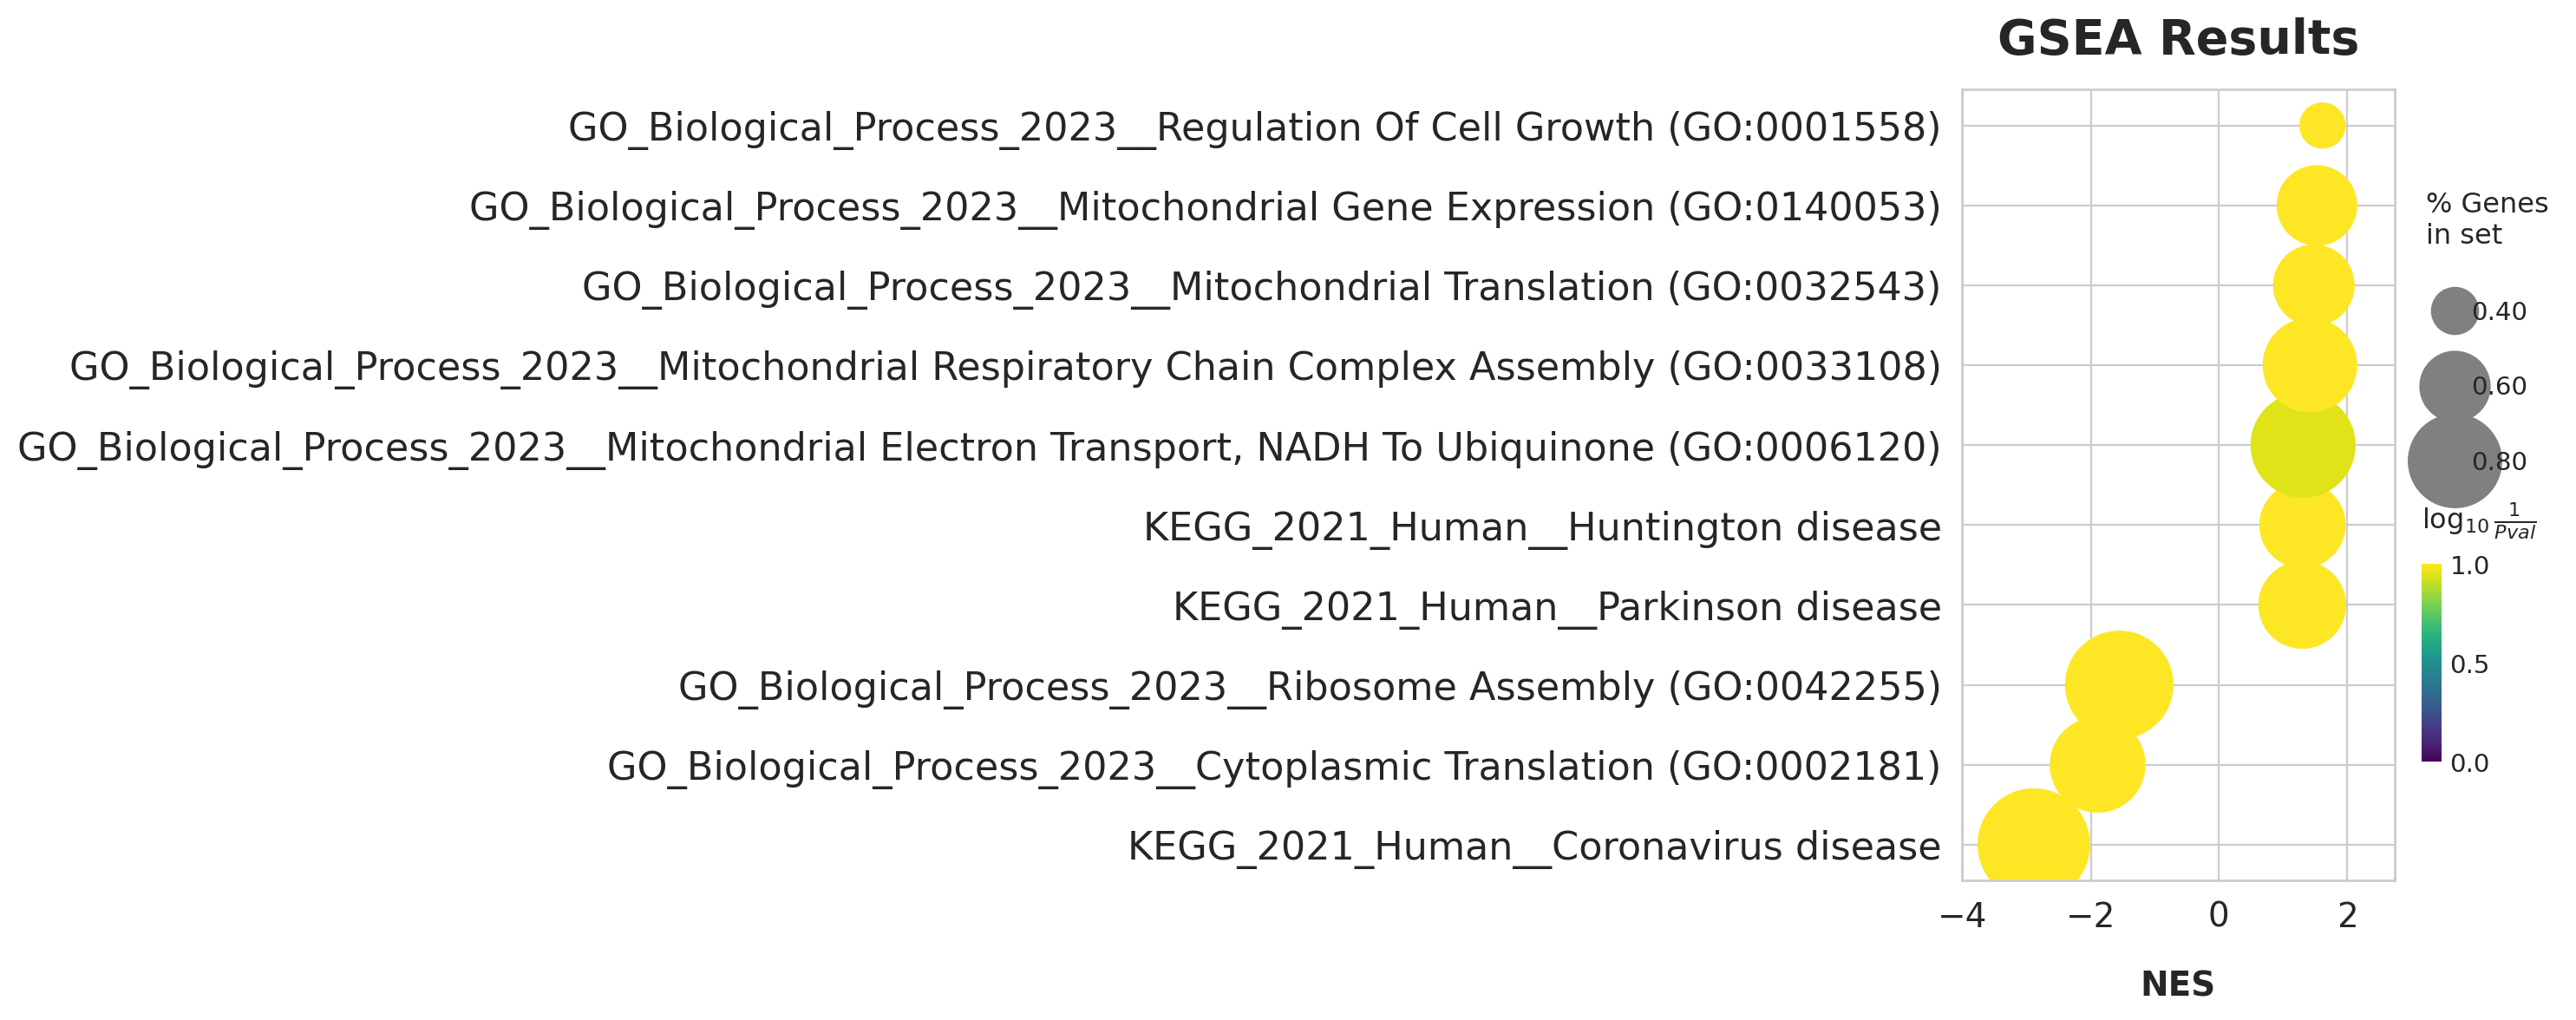

In [166]:
# 准备排序基因列表（按logFC降序）
gene_rank = deg_df.set_index('names')['logfoldchanges'].sort_values(ascending=False)

# 运行GSEA预排名分析
gsea_results = gp.prerank(
    rnk=gene_rank,
    gene_sets=['KEGG_2021_Human', 'GO_Biological_Process_2023'],
    processes=4,            # 并行线程数
    permutation_num=1000,   # 置换检验次数
    outdir='GSEA_results',  # 结果输出目录
    format='png',           # 输出图片格式
    seed=42
)

# 可视化Top通路
gp.dotplot(gsea_results.res2d, 
           column='NOM p-val',  # 显式指定校正p值列
           title='GSEA Results',
           cutoff=0.25,
           cmap='viridis',
           size=10,
           show_side_cbar=True)

In [167]:
gsea_results.res2d

Name                                               Term        ES  \
0    prerank               KEGG_2021_Human__Coronavirus disease -0.475144   
1    prerank  GO_Biological_Process_2023__Cytoplasmic Transl... -0.319254   
2    prerank  GO_Biological_Process_2023__Regulation Of Cell...  0.548184   
3    prerank  GO_Biological_Process_2023__Ribosome Assembly ... -0.360057   
4    prerank  GO_Biological_Process_2023__Mitochondrial Gene...  0.438977   
..       ...                                                ...       ...   
125  prerank  GO_Biological_Process_2023__Positive Regulatio...  0.164153   
126  prerank  GO_Biological_Process_2023__Positive Regulatio...  0.126896   
127  prerank  GO_Biological_Process_2023__Positive Regulatio...   0.12716   
128  prerank  GO_Biological_Process_2023__Protein Modificati...  0.135897   
129  prerank  GO_Biological_Process_2023__Regulation Of Tran...  0.084965   

          NES NOM p-val FDR q-val FWER p-val  Tag %  Gene %  \
0   -2.890904       0.0       0.0        0.0  37/38  47.24%   
1   -1.893753       0.0  0.026542    0.02505  29/35  34.56%   
2    1.616246  0.020548       1.0      0.638   6/15  12.68%   
3   -1.556712       0.0   0.17884   0.202405  15/16  53.63%   
4    1.529596  0.029289       1.0       0.87  23/33  41.93%   
..        ...       ...       ...        ...    ...     ...   
125  0.490019  0.985126       1.0        1.0   8/16  50.16%   
126  0.481199  0.991878       1.0        1.0  35/57  64.46%   
127  0.458582  0.985537       1.0        1.0   6/42  16.68%   
128  0.445377  0.992383       1.0        1.0  14/24  59.37%   
129  0.337658       1.0  0.999617        1.0  35/79  52.65%   

                                            Lead_genes  
0    TNFRSF1A;ADAR;NRP1;IL6ST;RPL11;RPS27;RPS18;RPL...  
1    RPL11;RPS27;RPS18;RPLP2;RPL34;RPL7A;RPS11;RPL1...  
2              SIPA1;LAMTOR1;LAMTOR2;DNPH1;HYAL2;MLST8  
3    RPL11;RPS27;RPL10;RPL23A;RPSA;RPS14;NPM1;RPS5;...  
4    MRPL58;MRPL49;MRPL43;MRPL10;MRPL55;MRPL36;MRPL...  
..                                                 ...  
125     PIN1;HRAS;CIB1;HLA-DRB1;SDCBP;CLDN3;PPIA;RACK1  
126  PIN1;IRF2BPL;TESC;HAX1;HYAL2;TAF10;PSMC5;RHOG;...  
127               PIN1;IRF2BPL;HAX1;HYAL2;TAF10;ZNHIT1  
128  DAD1;TAF10;UBE2L6;PHPT1;KRT10;CDC34;SERP1;TAF1...  
129  PIN1;IRF2BPL;HES4;HAX1;MRPL36;HYAL2;ZNF524;THA...  

[130 rows x 10 columns]

<Axes: title={'center': 'Top 20 Pathways by NES'}, xlabel='NES'>

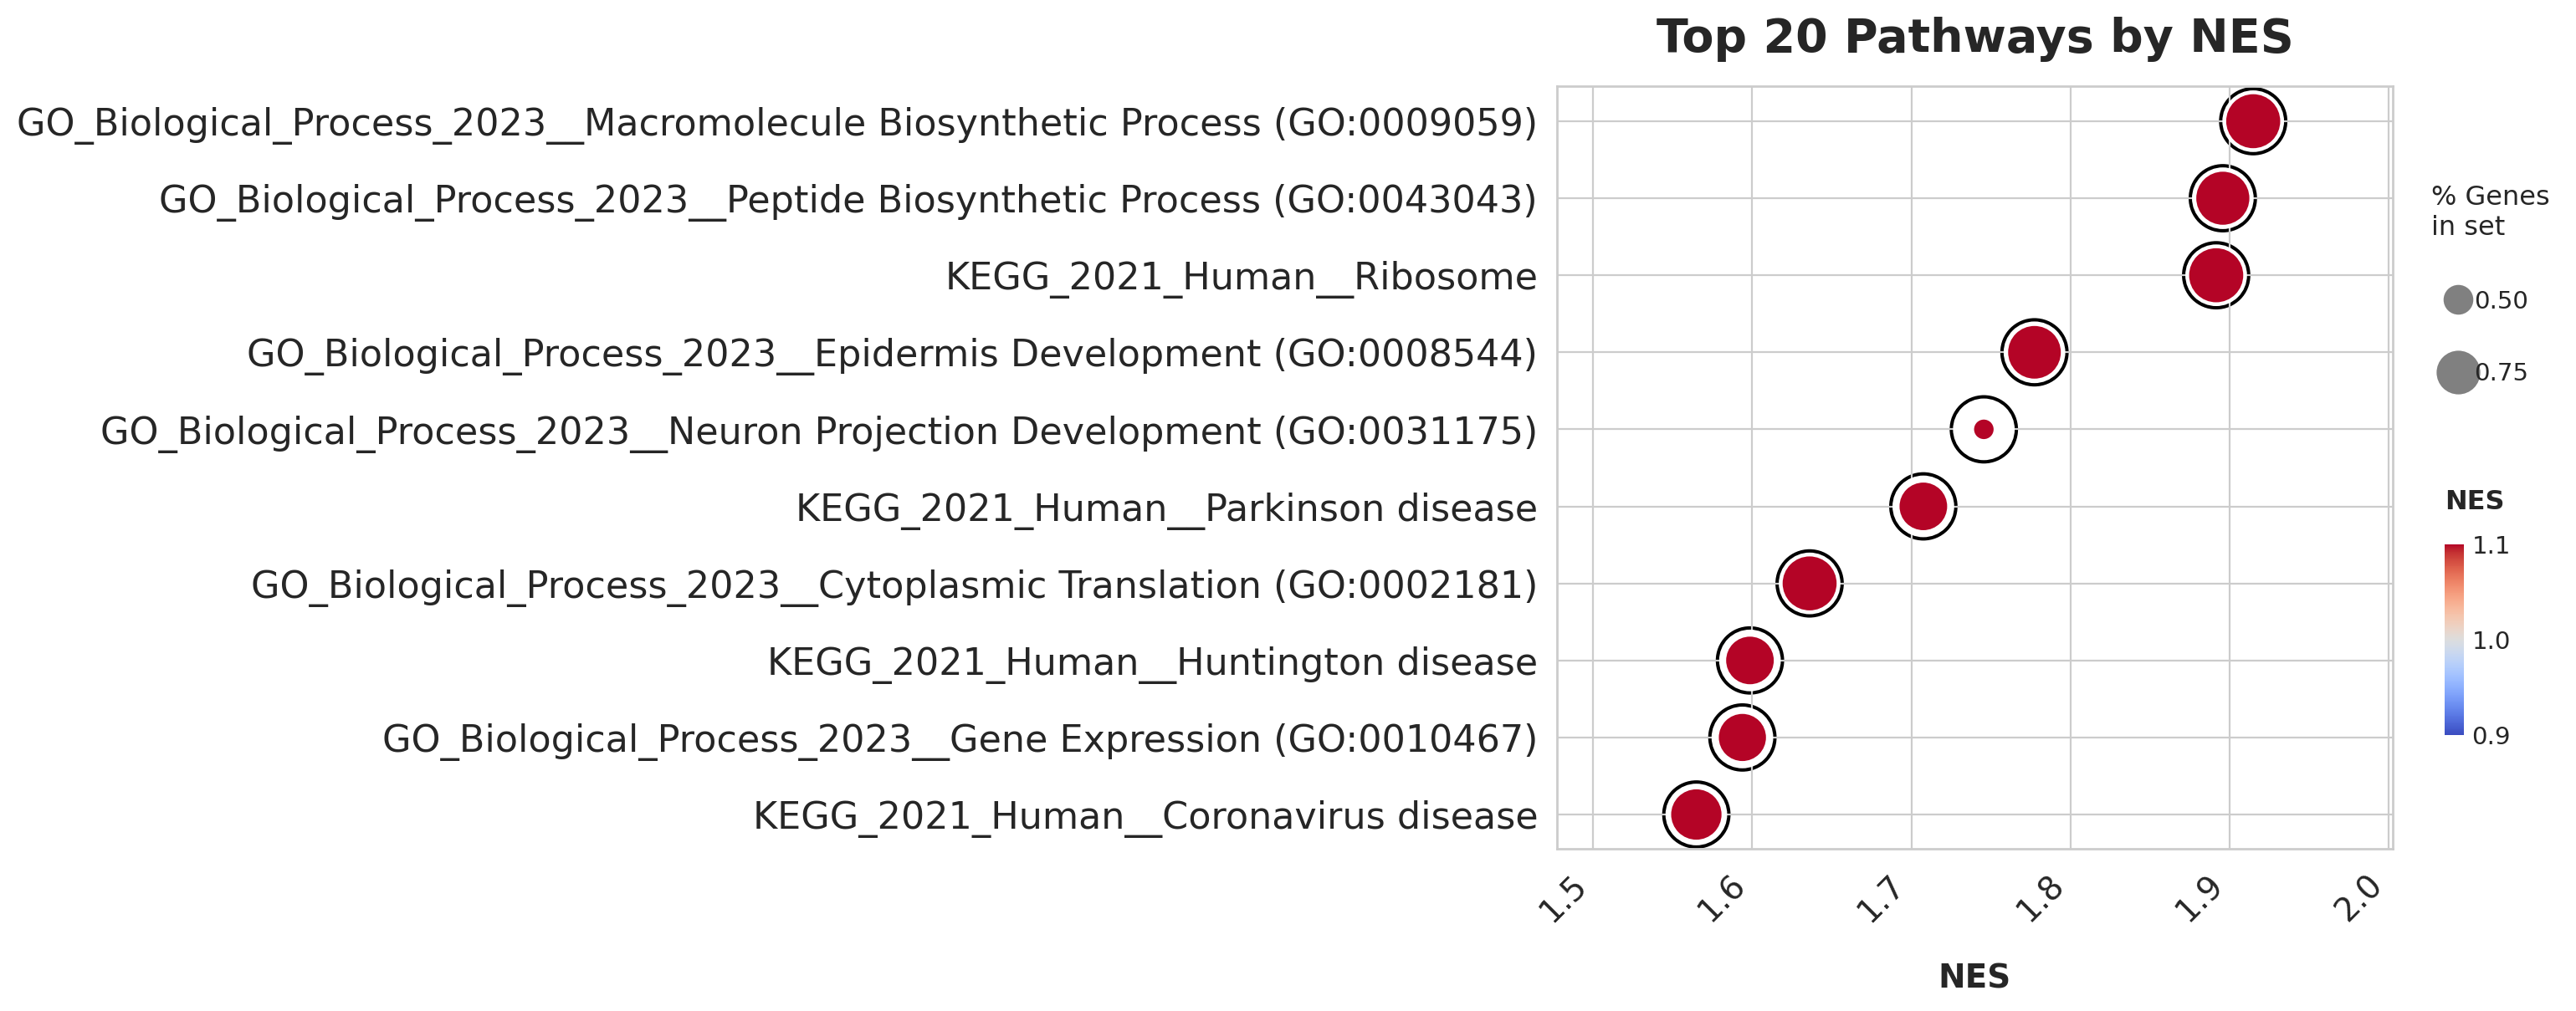

In [168]:
# 按NES绝对值排序并取Top20
top20_nes = significant_terms.sort_values('NES', ascending=False).head(20)

# 可视化设置
gp.dotplot(top20_nes, 
           column='NES',          # 使用NES值作为颜色映射
           title='Top 20 Pathways by NES',
           x='NES',               # X轴显示NES值
           y='Term',              # Y轴显示通路名称
           size=5,               # 点的大小与基因集大小相关
           cmap='coolwarm',       # 红蓝渐变色突出正负NES
           figsize=(8, 6),        # 调整画布尺寸
           xticklabels_rot=45,    # X轴标签旋转角度
           show_ring=True,        # 显示富集分数环

          )

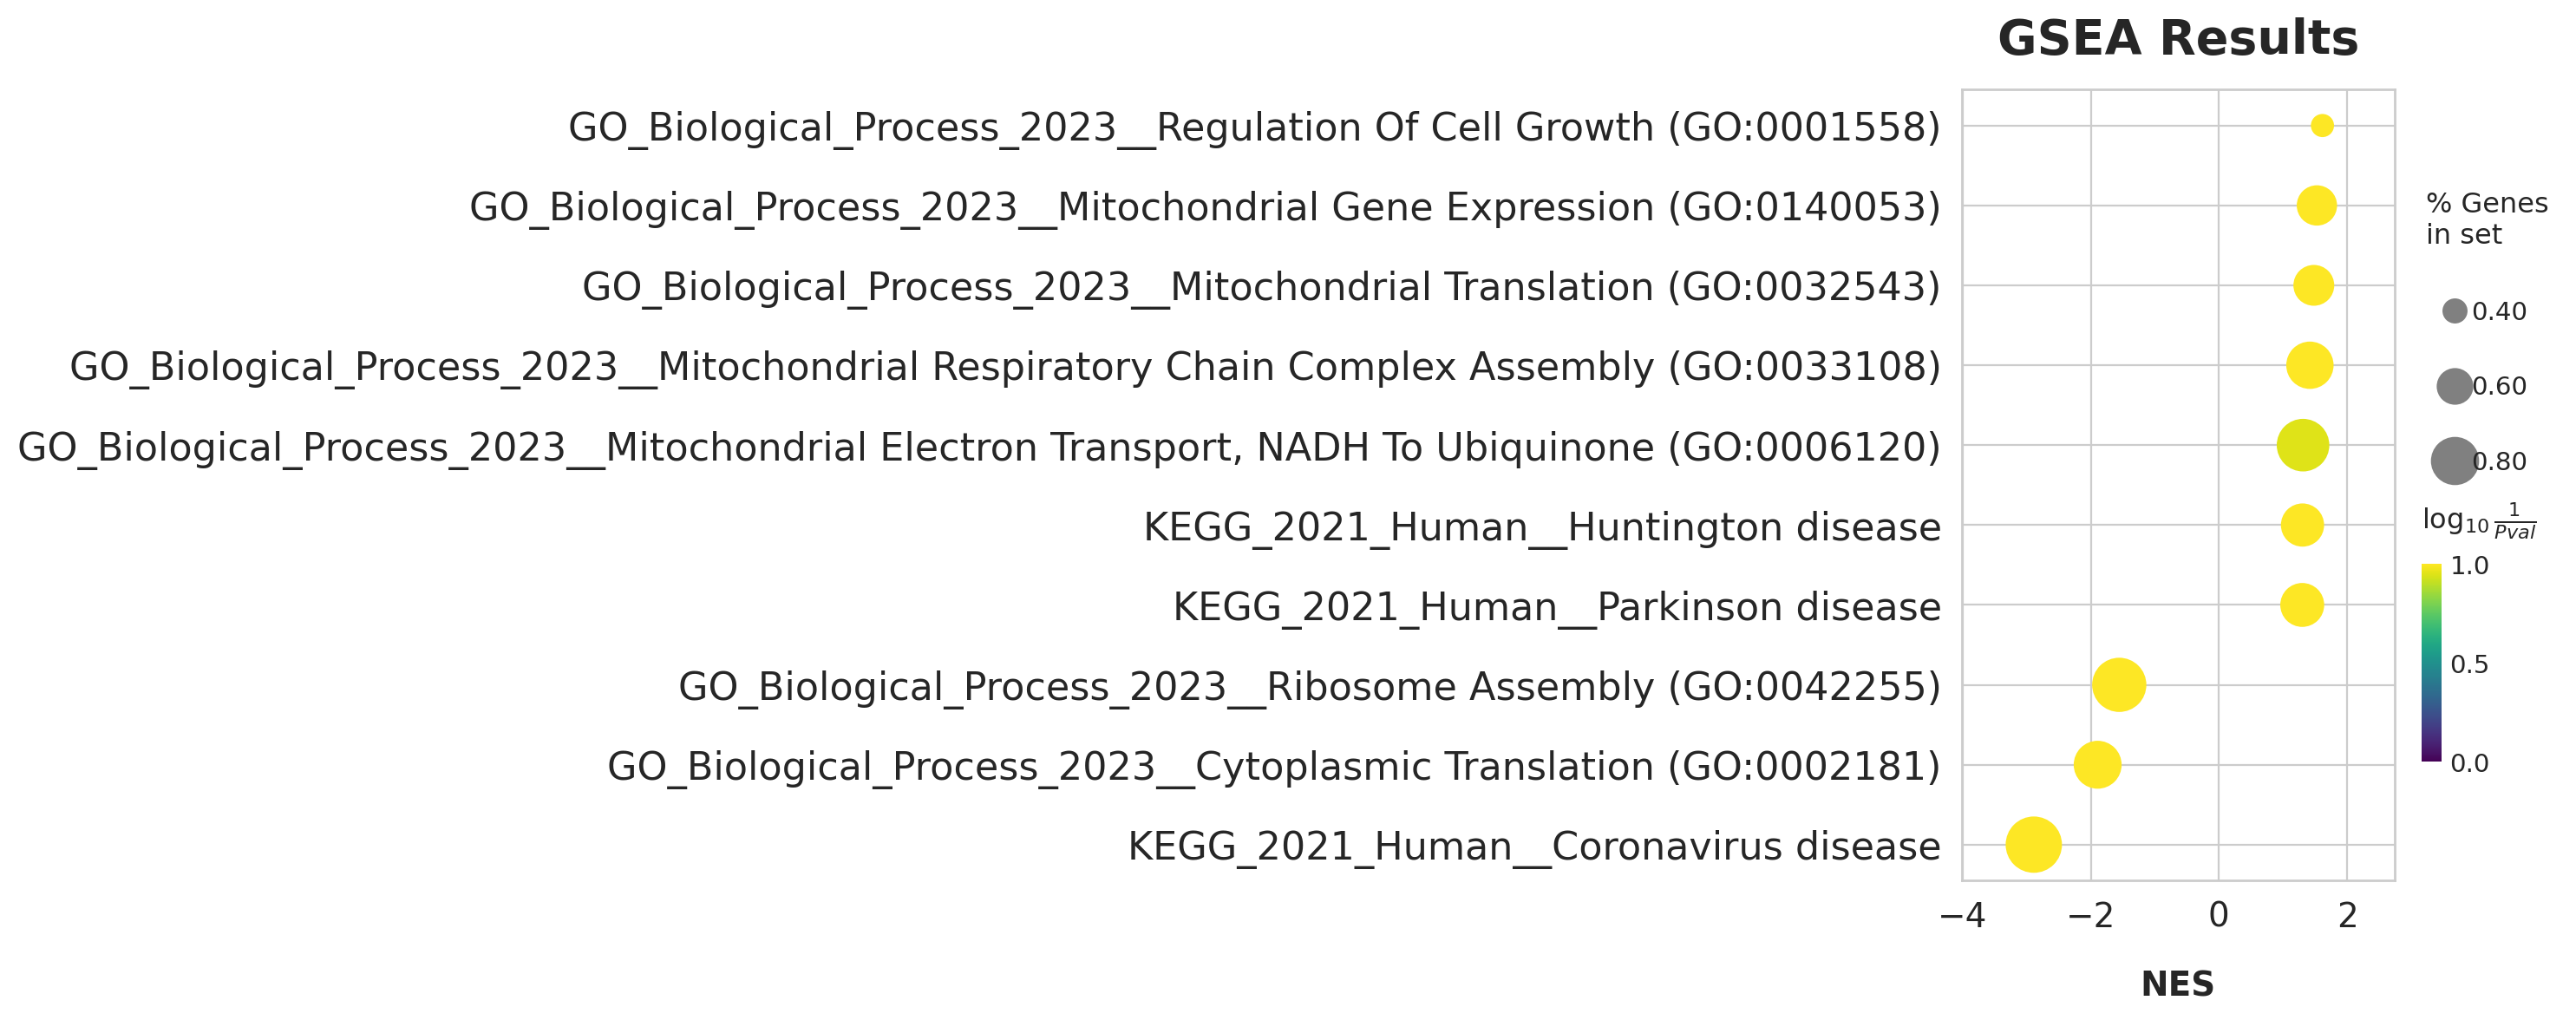

In [169]:
# 可视化Top通路
gp.dotplot(gsea_results.res2d, 
           column='NOM p-val',  # 显式指定校正p值列
           title='GSEA Results',
           cutoff=0.25,
           cmap='viridis',
           size=5,
           show_side_cbar=True,
           front_size=8)
plt.savefig("GSEA_Results.pdf",dpi=300,bbox_inches='tight')

In [146]:
# 准备排序基因列表（按logFC降序）
gene_rank = deg_df.set_index('names')['logfoldchanges'].sort_values(ascending=False)

# 运行GSEA预排名分析
gsea_results = gp.prerank(
    rnk=gene_rank,
    gene_sets=['KEGG_2021_Human', 'GO_Biological_Process_2023'],
    processes=4,            # 并行线程数
    permutation_num=1000,   # 置换检验次数
    outdir='GSEA_results',  # 结果输出目录
    format='png',           # 输出图片格式
    seed=42
)

# 可视化Top通路
gp.dotplot(gsea_results.res2d, 
           column='adj_pval',  # 显式指定校正p值列
           title='GSEA Results',
           cutoff=0.25,
           cmap='viridis',
           size=10,
           show_side_cbar=True)

/tmp/ipykernel_521337/3308727736.py:5: DeprecationWarning: processes is deprecated; use threads
  gsea_results = gp.prerank(
2025-04-23 21:03:23,673 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!


KeyError: 'adj_pval'

In [170]:
# 添加NES值筛选（|NES|>1）
significant_terms = gsea_results.res2d[
    (gsea_results.res2d['NOM p-val'] < 0.25) 
]
significant_terms.to_csv("/home/data/sdzl14/NSCLC/zong/tumor_edge_GSEA.csv")

<Axes: title={'center': 'Significant Pathways (|NES|>1)'}, xlabel='ES'>

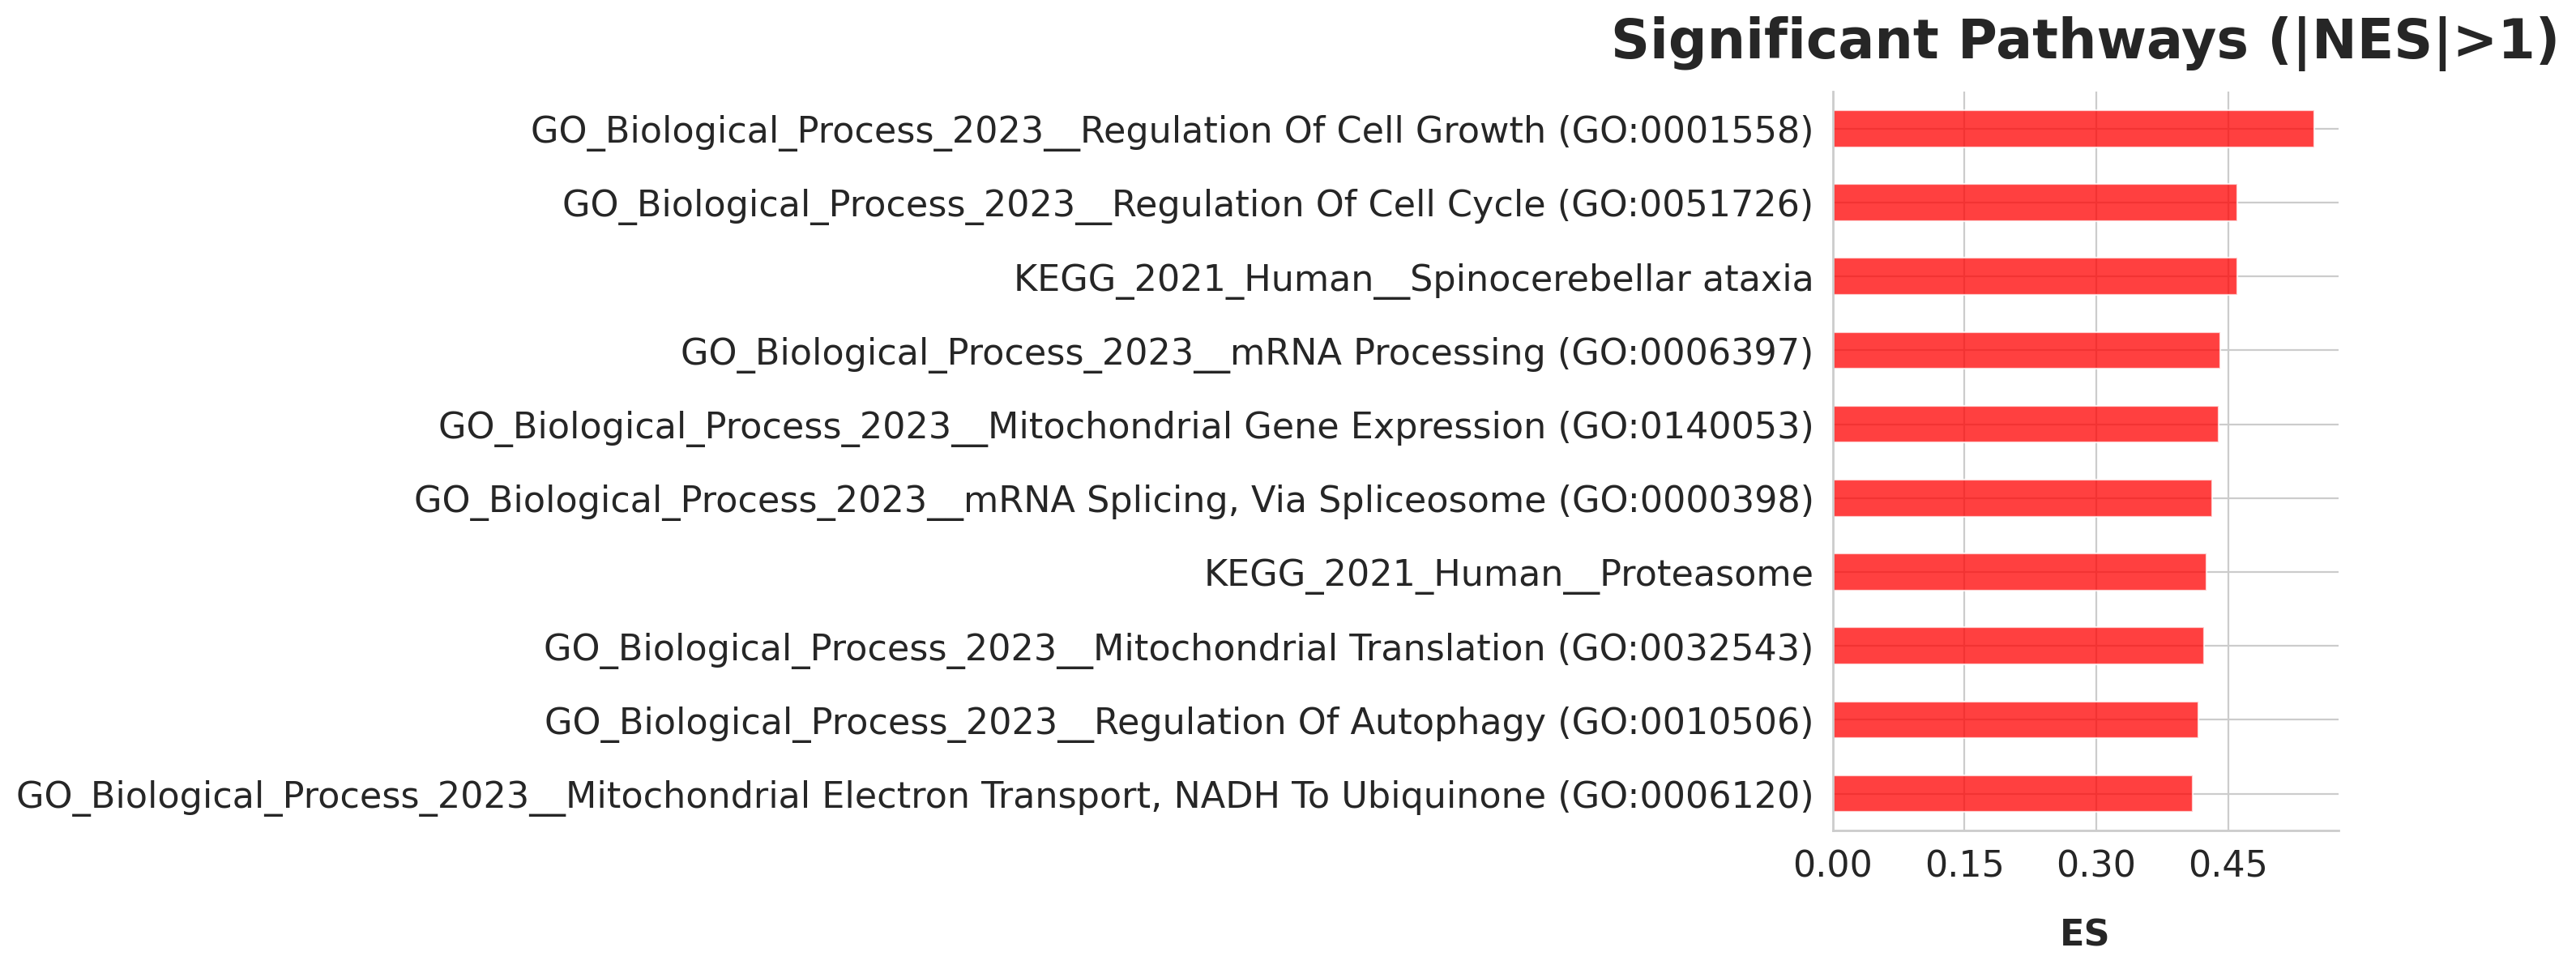

In [171]:
# 绘制气泡图
gp.barplot(significant_terms, 
           column='ES',
           title='Significant Pathways (|NES|>1)',
           color='red')

In [29]:
sc.tl.rank_genes_groups(
    malignant, 
    groupby='Tissue', 
    groups=['tumor_middle'],  # 关注组
    reference='rest',       # 对照组为其他所有样本
    method='wilcoxon',      # 非参数检验适合单细胞数据
    n_genes=2000,           # 保留top2000差异基因
    use_raw=False           # 使用processed数据
)


# 提取显著差异基因 (FDR<0.05 & logFC>1)
deg_df = sc.get.rank_genes_groups_df(malignant, group='tumor_middle')
deg_filtered = deg_df[
    (deg_df['pvals_adj'] < 0.05) & 
    (deg_df['logfoldchanges'] > 1)
]

/home/data/sdzl14/anaconda3/envs/myenv/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


In [31]:
gsea_results.res2d

Name                                               Term        ES  \
0    prerank  GO_Biological_Process_2023__Mitotic Sister Chr...  -0.72773   
1    prerank  GO_Biological_Process_2023__Macromolecule Bios...  0.623581   
2    prerank  GO_Biological_Process_2023__Peptide Biosynthet...  0.616589   
3    prerank                          KEGG_2021_Human__Ribosome  0.608337   
4    prerank  GO_Biological_Process_2023__Positive Regulatio... -0.582196   
..       ...                                                ...       ...   
217  prerank  GO_Biological_Process_2023__Transcription By R... -0.173149   
218  prerank  GO_Biological_Process_2023__Protein Transport ... -0.200318   
219  prerank  GO_Biological_Process_2023__DNA-templated Tran...  0.214016   
220  prerank  GO_Biological_Process_2023__Organelle Assembly...  0.189675   
221  prerank  GO_Biological_Process_2023__Cellular Response ...  0.176537   

          NES NOM p-val FDR q-val FWER p-val  Tag %  Gene %  \
0   -2.270517       0.0  0.001105      0.001  13/28  10.83%   
1    1.914724       0.0  0.009613       0.01  61/63  39.80%   
2     1.89564       0.0  0.006729      0.014  59/62  39.80%   
3    1.891469       0.0  0.005127      0.016  64/66  39.80%   
4   -1.868501       0.0  0.061894      0.097  18/28  22.36%   
..        ...       ...       ...        ...    ...     ...   
217 -0.561735  0.988327       1.0        1.0   6/26  17.32%   
218 -0.548258  0.980263  0.987742        1.0   7/17  31.17%   
219  0.528335  0.987324       1.0        1.0   7/19  34.19%   
220  0.526085  0.988127  0.994104        1.0   7/35  26.70%   
221  0.412577  0.994065  0.998946        1.0   4/15  27.02%   

                                            Lead_genes  
0    CEP55;SPAG5;CHEK2;KNSTRN;KIFC1;AKAP8L;KIF23;PI...  
1    RPL17;EIF5A;RPS26;MRPS17;EEF2;RPL41;RPL6;RPLP0...  
2    RPL17;RPS26;MRPS17;RPL41;RPL6;RPLP0;RPL35;RPL3...  
3    RPL17;MRPL30;RPL36A;RPS26;MRPS17;RPL41;RPL6;RP...  
4    SPAG5;CDC6;SASS6;KIF23;CDCA8;NDC80;SOX15;NCAPH...  
..                                                 ...  
217                 TAF4B;GTF2H3;MED26;GMEB2;ZC3H8;PIR  
218        CENPF;RAB43;VPS26A;RAB23;TANGO6;NDC1;SCAMP5  
219            DEK;MLF1;GTF2H5;CCDC124;IRF9;MAF;POLR2L  
220  GABARAP;GABARAPL1;CDC14A;CFAP161;ATG9B;MVB12A;...  
221                          IFI16;NDUFA13;PTPRT;CCL18  

[222 rows x 10 columns]

In [33]:
gsea_results

/tmp/ipykernel_521337/723345843.py:5: DeprecationWarning: processes is deprecated; use threads
  gsea_results = gp.prerank(
2025-04-23 08:30:19,891 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!


<Axes: title={'center': 'GSEA Results'}, xlabel='NES'>

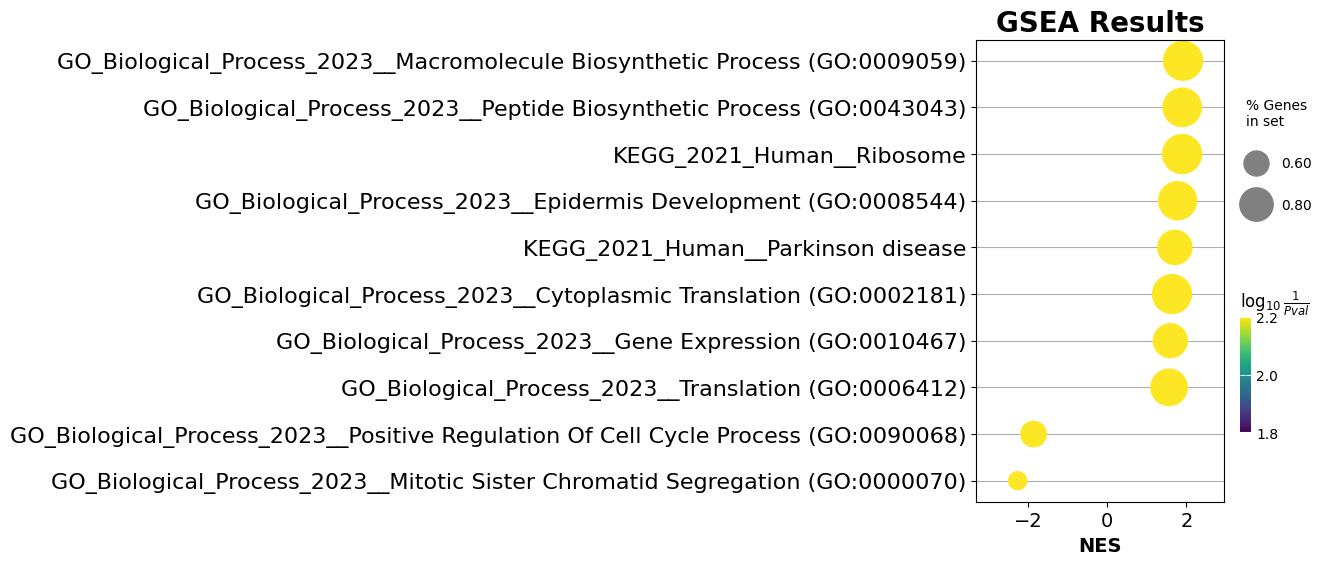

In [47]:
# 准备排序基因列表（按logFC降序）
gene_rank = deg_df.set_index('names')['logfoldchanges'].sort_values(ascending=False)

# 运行GSEA预排名分析
gsea_results = gp.prerank(
    rnk=gene_rank,
    gene_sets=[ 'GO_Biological_Process_2023','GO_Molecular_Function_2023','KEGG_2021_Human'],
    processes=4,            # 并行线程数
    permutation_num=1000,   # 置换检验次数
    outdir='GSEA_results',  # 结果输出目录
    format='png',           # 输出图片格式
    seed=42
)

# 可视化Top通路
gp.dotplot(gsea_results.res2d, 
           column='NOM p-val',  # 显式指定校正p值列
           title='GSEA Results',
           cutoff=0.25,
           cmap='viridis',
           size=5,
           show_side_cbar=True)

In [48]:
# 添加NES值筛选（|NES|>1）
significant_terms = gsea_results.res2d[
    (gsea_results.res2d['NOM p-val'] < 0.25) 
]

In [49]:
significant_terms

Name                                               Term        ES  \
0    prerank  GO_Biological_Process_2023__Mitotic Sister Chr...  -0.72773   
1    prerank  GO_Biological_Process_2023__Macromolecule Bios...  0.623581   
2    prerank  GO_Biological_Process_2023__Peptide Biosynthet...  0.616589   
3    prerank                          KEGG_2021_Human__Ribosome  0.608337   
4    prerank  GO_Biological_Process_2023__Positive Regulatio... -0.582196   
..       ...                                                ...       ...   
92   prerank  GO_Biological_Process_2023__Positive Regulatio... -0.320938   
93   prerank  GO_Molecular_Function_2023__Calcium Ion Bindin... -0.373516   
94   prerank  GO_Biological_Process_2023__Positive Regulatio...  0.359118   
95   prerank  GO_Biological_Process_2023__Positive Regulatio... -0.310354   
104  prerank  GO_Biological_Process_2023__Regulation Of DNA-...  0.326474   

          NES NOM p-val FDR q-val FWER p-val   Tag %  Gene %  \
0   -2.270517       0.0  0.003451      0.002   13/28  10.83%   
1    1.914724       0.0  0.009457       0.01   61/63  39.80%   
2     1.89564       0.0   0.00662      0.014   59/62  39.80%   
3    1.891469       0.0  0.005044      0.016   64/66  39.80%   
4   -1.868501       0.0  0.077079      0.113   18/28  22.36%   
..        ...       ...       ...        ...     ...     ...   
92  -1.160493  0.188776  0.583023        1.0   13/54  10.64%   
93  -1.159606  0.234114  0.568143        1.0    5/23   8.94%   
94   1.153702  0.229698  0.823437        1.0   24/81  22.10%   
95  -1.141686  0.231183  0.597434        1.0   20/59  18.51%   
104  1.120884  0.249211  0.851501        1.0  40/169  16.56%   

                                            Lead_genes  
0    CEP55;SPAG5;CHEK2;KNSTRN;KIFC1;AKAP8L;KIF23;PI...  
1    RPL17;EIF5A;RPS26;MRPS17;EEF2;RPL41;RPL6;RPLP0...  
2    RPL17;RPS26;MRPS17;RPL41;RPL6;RPLP0;RPL35;RPL3...  
3    RPL17;MRPL30;RPL36A;RPS26;MRPS17;RPL41;RPL6;RP...  
4    SPAG5;CDC6;SASS6;KIF23;CDCA8;NDC80;SOX15;NCAPH...  
..                                                 ...  
92   HMGA2;AKR1C2;CDK2;BCL7A;FGFR1;PDCD10;SOX15;SPD...  
93                       LOXL2;BNIP2;PLSCR2;ITGB1;MELK  
94   HDAC2;SOX18;FOSL2;ERG;GPS2;NME2;HMGB2;HMGA1;GR...  
95   SPAG5;AKR1C2;CDK2;BCL7A;FGFR1;CAV1;PDCD10;SPDY...  
104  TBX6;BMP7;ACTR6;ERF;HDAC2;TESC;SOX18;BCL11A;FO...  

[97 rows x 10 columns]

有效基因数: 120/147


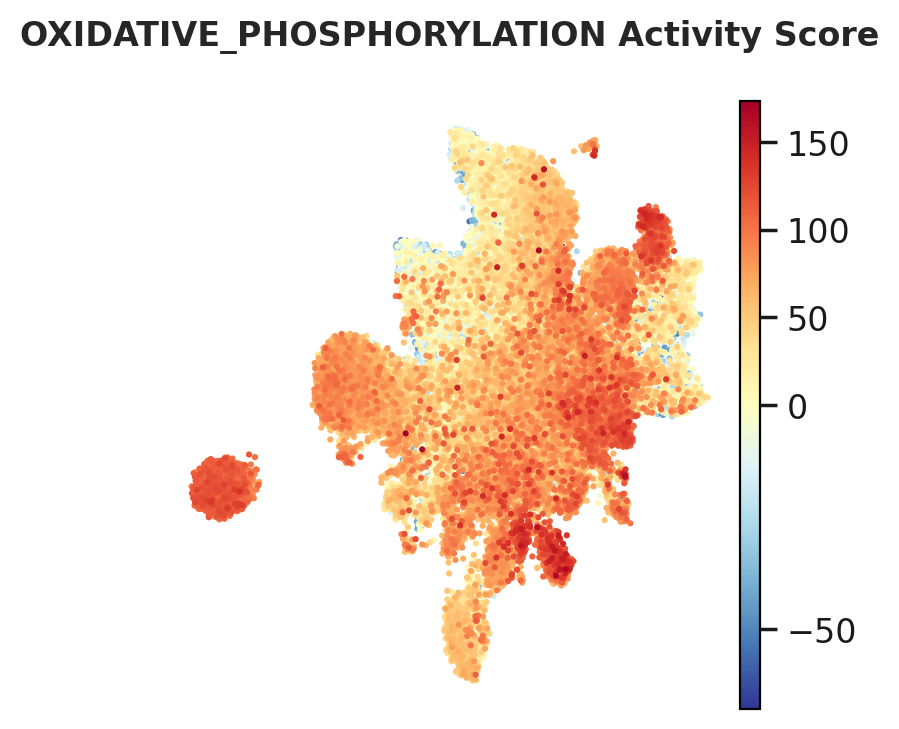

In [180]:
# 定义目标基因列表 (已修正重复逗号问题)
cell_cycle_genes = [
 'UQCRFS1P1', 'NDUFC2-KCTD14', 'PPIF', 'ATP5PD', 'ATP5MG', 'MTCO2P12', 'UQCR11', 'PARK7', 'COX6B2', 'NDUFA11', 'COX4I1', 'COX5B', 'COX6A1', 'COX6A2', 'COX6B1', 'ATPSCKMT', 'COX6C', 'COX7A1', 'COX7A2', 'COX7A2P2', 'COX7B', 'COX7C', 'COX8A', 'CYC1', 'COX7B2', 'DGUOK', 'DLD', 'AK4', 'C2orf69', 'ABCD1', 'ISCU', 'FXN', 'AFG1L', 'NIPSNAP2', 'NUPR1', 'GHITM', 'UQCRQ', 'DNAJC15', 'UQCR10', 'STOML2', 'COX8C', 'NDUFS7', 'RHOA', 'COA6', 'CHCHD10', 'MIR210', 'ATP5F1EP2', 'UQCRHL', 'MSH2', 'MT-ATP6', 'MT-ATP8', 'MT-CO1', 'MT-CO2', 'MT-CO3', 'MT-CYB', 'MT-ND1', 'MT-ND2', 'MT-ND3', 'MT-ND4', 'MT-ND4L', 'MT-ND5', 'MT-ND6', 'NDUFA1', 'NDUFA2', 'NDUFA3', 'NDUFA4', 'NDUFA5', 'NDUFA6', 'NDUFA7', 'NDUFA8', 'NDUFA9', 'NDUFA10', 'NDUFAB1', 'NDUFB1', 'NDUFB2', 'NDUFB3', 'NDUFB4', 'NDUFB5', 'NDUFB6', 'NDUFB7', 'NDUFB8', 'NDUFB9', 'NDUFB10', 'NDUFC1', 'NDUFC2', 'NDUFS1', 'NDUFS2', 'NDUFS3', 'NDUFV1', 'NDUFS4', 'NDUFS5', 'NDUFS6', 'NDUFS8', 'NDUFV2', 'NDUFV3', 'ATP5F1A', 'ATP5F1B', 'ATP5F1C', 'NDUFA13', 'MLXIPL', 'NDUFAF1', 'CHCHD2', 'ATP5F1D', 'ATP5F1E', 'ATP5PB', 'ATP5ME', 'ATP5PF', 'ATP7A', 'ATP5PO', 'CYCS', 'NDUFB11', 'SDHAF2', 'NDUFA12', 'COQ9', 'BID', 'SDHA', 'SDHB', 'SDHC', 'SDHD', 'SHMT2', 'PINK1', 'TMEM135', 'ANTKMT', 'SNCA', 'TAFAZZIN', 'TNF', 'UQCRB', 'UQCRC1', 'UQCRC2', 'UQCRFS1', 'UQCRH', 'VCP', 'SLC25A23', 'UQCC3', 'TEFM', 'SLC25A33', 'DNAJC30', 'UQCC2', 'COX4I2', 'ACTN3', 'CCNB1', 'COX7A2L', 'SLC25A51', 'COX5A', 'ATP5MF', 'MACROH2A1', 'CDK1'
]
malignant = malignant.copy()
# 过滤存在于数据的基因
valid_genes = [g for g in cell_cycle_genes if g in malignant.var_names]
print(f"有效基因数: {len(valid_genes)}/{len(cell_cycle_genes)}")

# 计算基因表达总和
malignant.obs['cell_cycle_score'] = np.array(malignant[:, valid_genes].X.sum(axis=1)).flatten()
# 可视化设置
sc.set_figure_params(
    frameon=False, 
    dpi=100, 
    facecolor='white',
    fontsize=12
)

# 绘制UMAP
fig = sc.pl.umap(
    malignant,
    color='cell_cycle_score',
    color_map='RdYlBu_r',  # 红-蓝渐变色
    vcenter=0,             # 居中颜色映射
    size=20,               # 点的大小
    edges=False,           # 关闭边线
    legend_loc='on data',  # 图例位置
    title='OXIDATIVE_PHOSPHORYLATION Activity Score',
    return_fig=True
)

# 保存结果
fig.savefig(
    'OXIDATIVE_PHOSPHORYLATION_umap.pdf', 
    dpi=300, 
    bbox_inches='tight'
)

/home/data/sdzl14/anaconda3/envs/myenv/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


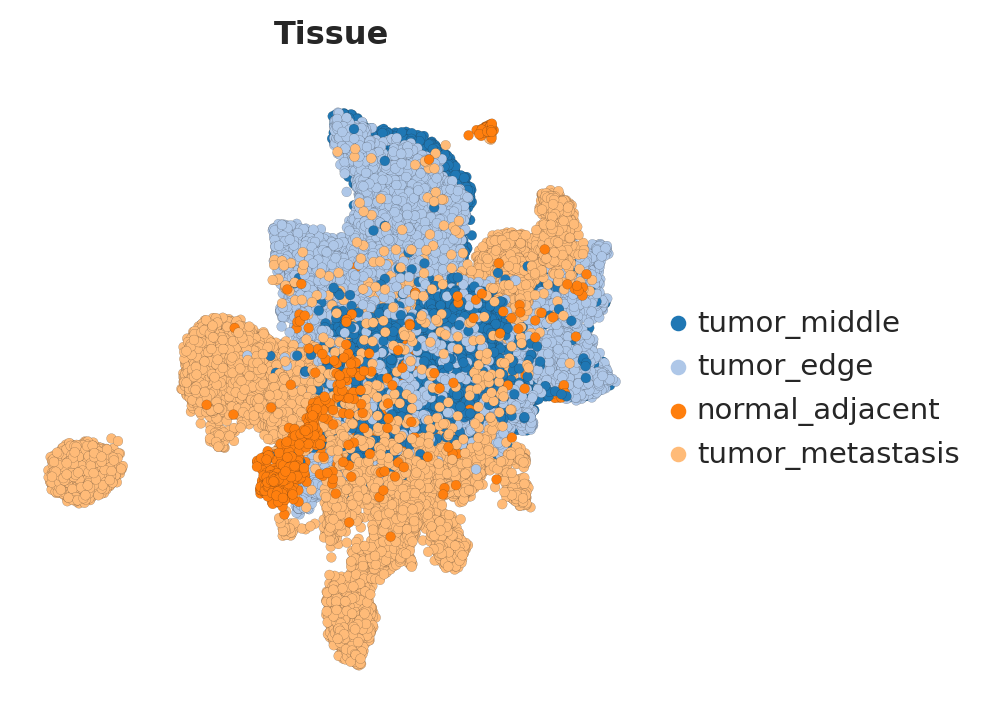

In [156]:
sc.pl.umap(malignant, color=['Tissue'], palette=sc.pl.palettes.vega_20, size=50, edgecolor='k', linewidth=0.05,)

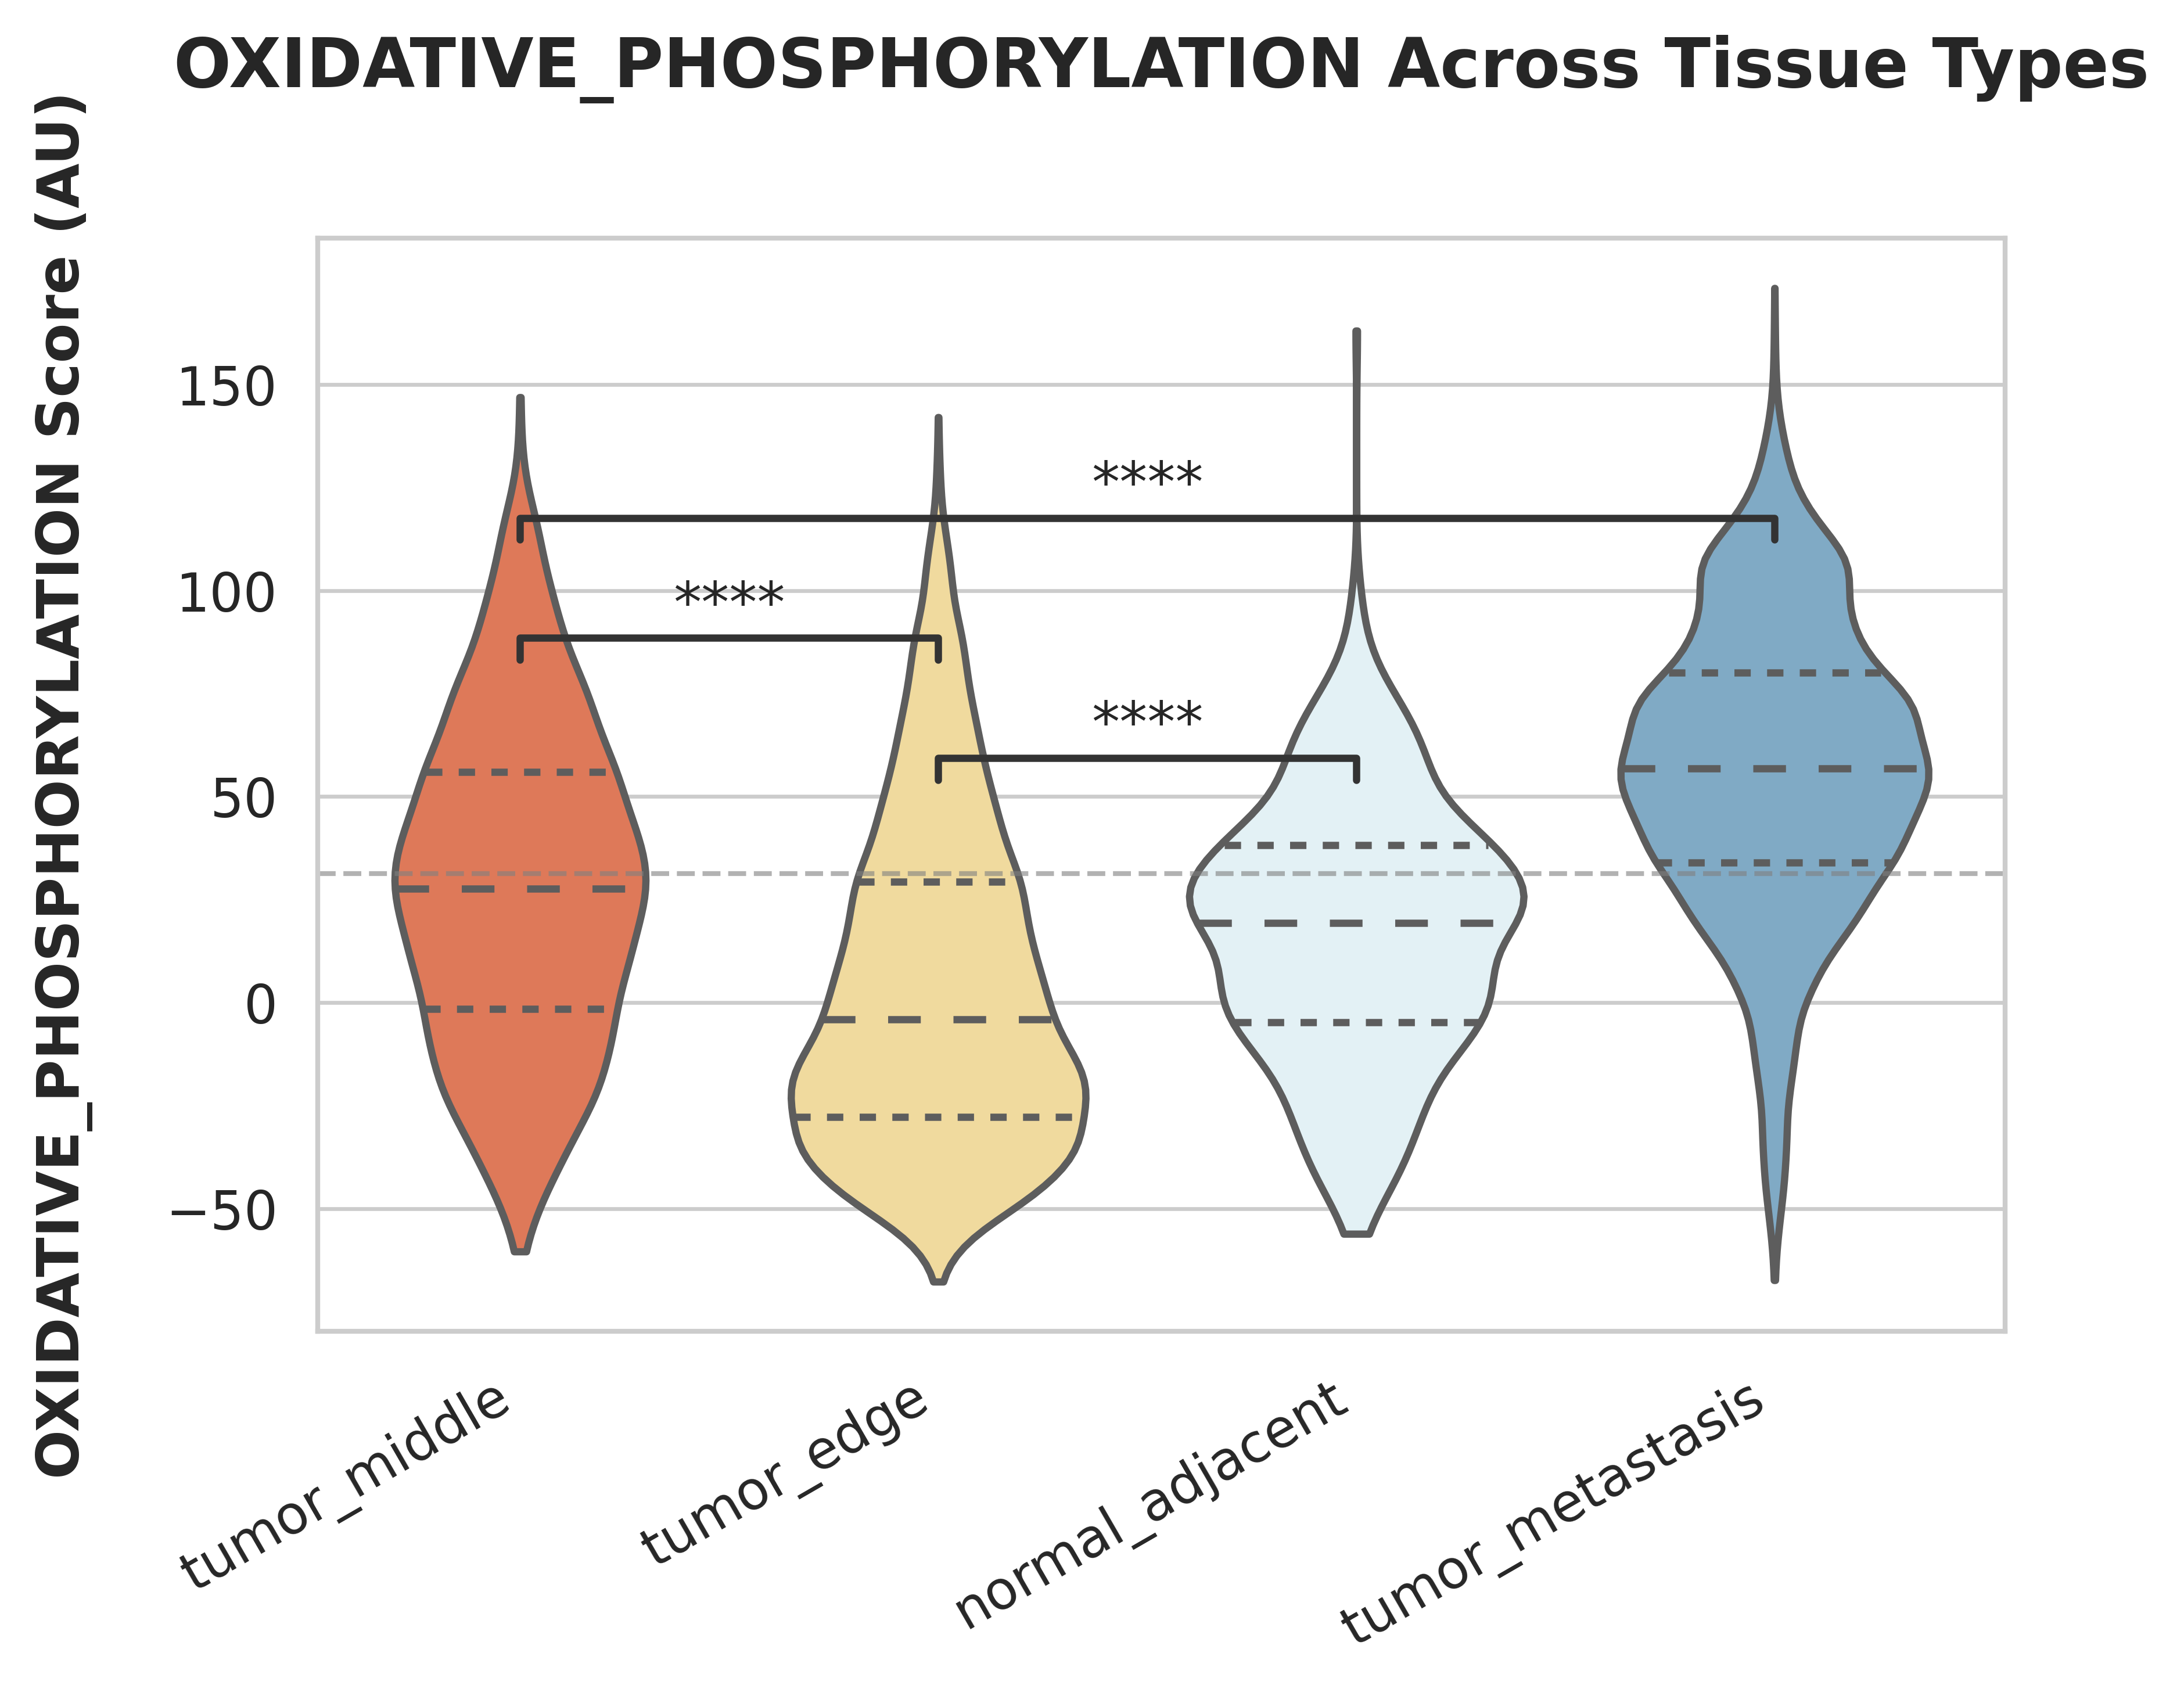

In [181]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# 强制组织排序 (根据生物学意义)
tissue_order = [
    'tumor_middle',
    'tumor_edge', 
    'normal_adjacent',
    'tumor_metastasis'
]

# 创建绘图数据
plot_df = malignant.obs[['Tissue', 'cell_cycle_score']].copy()
plot_df['Tissue'] = pd.Categorical(plot_df['Tissue'], categories=tissue_order)

# 统计检验准备
pairs = [
    ('normal_adjacent', 'tumor_edge'),
    ('tumor_edge', 'tumor_middle'),
    ('tumor_middle', 'tumor_metastasis')
]

# 可视化设置
plt.figure(figsize=(6,5), dpi=300)
sns.set_theme(
    style="whitegrid",
    context="paper",
    font_scale=1.2,
    rc={'axes.titlepad': 15}
)

# 创建小提琴图
ax = sns.violinplot(
    data=plot_df,
    x='Tissue',
    y='cell_cycle_score',
    order=tissue_order,
    palette='RdYlBu',  # 红->蓝渐变
    inner='quartile',   # 显示四分位线
    cut=0,             # 紧贴数据范围
    linewidth=1.5
)

# 添加统计显著性
annotator = Annotator(
    ax,
    pairs,
    data=plot_df,
    x='Tissue',
    y='cell_cycle_score'
)
annotator.configure(
    test='Mann-Whitney',  # 非参数检验
    text_format='star',
    loc='inside',
    verbose=0
)
annotator.apply_and_annotate()

# 样式优化
plt.title("OXIDATIVE_PHOSPHORYLATION Across Tissue Types\n", 
         fontsize=14, fontweight='semibold')
plt.xlabel("")
plt.ylabel("OXIDATIVE_PHOSPHORYLATION Score (AU)", fontsize=12)
plt.xticks(
    rotation=30, 
    ha='right',
    fontsize=11,
    fontweight='medium'
)
plt.yticks(fontsize=11)

# 添加参考线
plt.axhline(
    y=plot_df['cell_cycle_score'].median(),
    color='gray',
    linestyle='--',
    linewidth=1,
    alpha=0.6
)

# 保存输出
plt.tight_layout()
plt.savefig(
    'OXIDATIVE_PHOSPHORYLATION_violin.pdf', 
    dpi=300, 
    bbox_inches='tight'
)

In [113]:
marker_dict = {'tumor_middle': ['NME2','ANGPTL4', 'MTMR11', 'NGRN'],
 'tumor_edge': ['IGLC2','PTPRT', 'TGM1', 'CNTN1'],
 'normal_adjacent': ['CLU','CSF3', 'ALDH1A1', 'EPHA2'],
 'tumor_metastasis': ['ALDOA','NDUFAF3', 'PHLDA2', 'NDUFB6']}

In [111]:
marker_genes = ['NME2','ANGPTL4', 'MTMR11', 'NGRN','IGLC2','PTPRT', 'TGM1', 'CNTN1','CLU','CSF3', 'ALDH1A1', 'EPHA2','ALDOA','NDUFAF3', 'PHLDA2', 'NDUFB6']

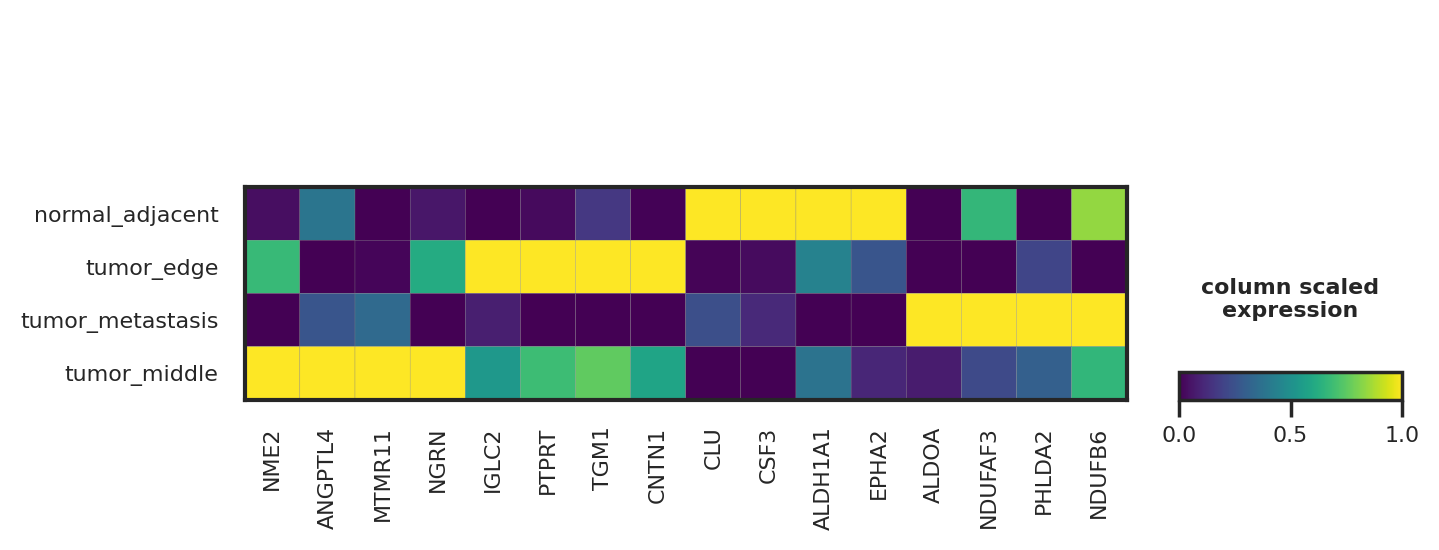

In [112]:
sc.pl.matrixplot(malignant, marker_genes, 'Tissue', standard_scale='var',
                 colorbar_title='column scaled\nexpression')

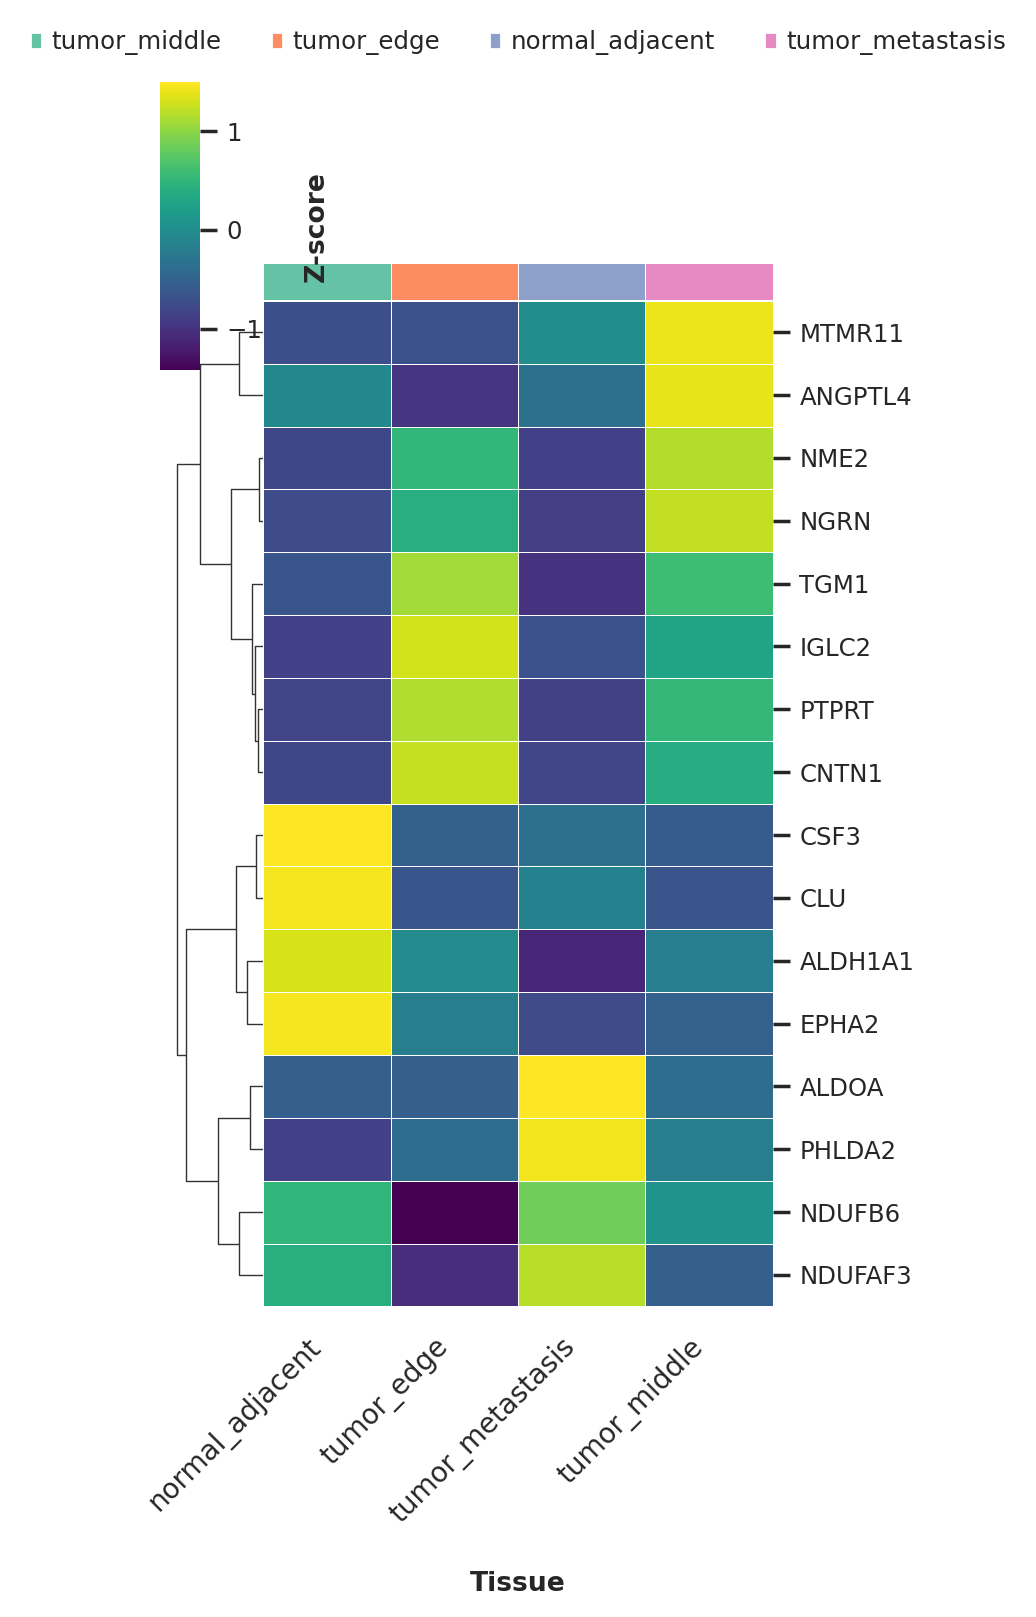

In [118]:
# 步骤0: 强制定义组织顺序 --------------------------------------------------
TISSUE_ORDER = ['tumor_middle', 'tumor_edge', 'normal_adjacent', 'tumor_metastasis']

# 步骤1: 确保元数据中的组织顺序正确 ------------------------------------------
# 将Tissue列转换为有序分类变量
malignant.obs['Tissue'] = pd.Categorical(
    malignant.obs['Tissue'],
    categories=TISSUE_ORDER,
    ordered=True
)

# 步骤2: 修改分组计算逻辑 --------------------------------------------------
# 按预定义顺序分组计算均值 (添加 observed=True 参数)
grouped_exp = exp_df.groupby(
    malignant.obs['Tissue'], 
    axis=1, 
    observed=True  # 确保使用分类顺序
).mean()

# 步骤3: 筛选实际存在的组织 -------------------------------------------------
# 过滤数据中实际存在的组织
existing_tissues = [t for t in TISSUE_ORDER if t in grouped_exp.columns]
grouped_exp = grouped_exp[existing_tissues]

# 步骤4: 修改热图绘制参数 ---------------------------------------------------
# 绘制热图（禁用列聚类，保持预定义顺序）
ax = sns.clustermap(
    zscore_df,
    cmap=CMAP,
    row_cluster=CLUSTER_GENES,  # 保持基因聚类
    col_cluster=False,          # 禁用组织聚类
    dendrogram_ratio=(0.15, 0.15),  # 调整树状图比例
    col_colors=[sns.color_palette("Set2", len(existing_tissues))],  # 添加颜色条
    figsize=(4, 8),            # 调整画布尺寸
    linewidths=0.3,             # 更细的网格线
    cbar_kws={'label': 'Z-score'}  # 颜色条标签
)

# 步骤5: 优化标签显示 -------------------------------------------------------
# 旋转组织标签
ax.ax_heatmap.set_xticklabels(
    ax.ax_heatmap.get_xticklabels(),
    rotation=45,
    ha='right',
    fontsize=10
)

# 添加组织类型颜色条说明
for idx, tissue in enumerate(existing_tissues):
    ax.ax_col_dendrogram.bar(0, 0, color=sns.color_palette("Set2")[idx], label=tissue)
ax.ax_col_dendrogram.legend(
    loc='center', 
    ncol=len(existing_tissues),
    bbox_to_anchor=(0.5, 1.2),
    frameon=False
)
# 保存结果
SAVE_PATH = 'Tissuemarker_heatma-.pdf'

plt.savefig(
    SAVE_PATH, 
    dpi=300, 
    bbox_inches='tight'
)

In [ ]:
# 准备排序基因列表（按logFC降序）
gene_rank = deg_df.set_index('names')['logfoldchanges'].sort_values(ascending=False)

# 运行GSEA预排名分析
gsea_results = gp.prerank(
    rnk=gene_rank,
    gene_sets=['KEGG_2021_Human', 'GO_Biological_Process_2023'],
    processes=4,            # 并行线程数
    permutation_num=1000,   # 置换检验次数
    outdir='GSEA_results',  # 结果输出目录
    format='png',           # 输出图片格式
    seed=42
)

# 可视化Top通路
gp.dotplot(gsea_results.res2d, 
           column='adj_pval',  # 显式指定校正p值列
           title='GSEA Results',
           cutoff=0.25,
           cmap='viridis',
           size=10,
           show_side_cbar=True)

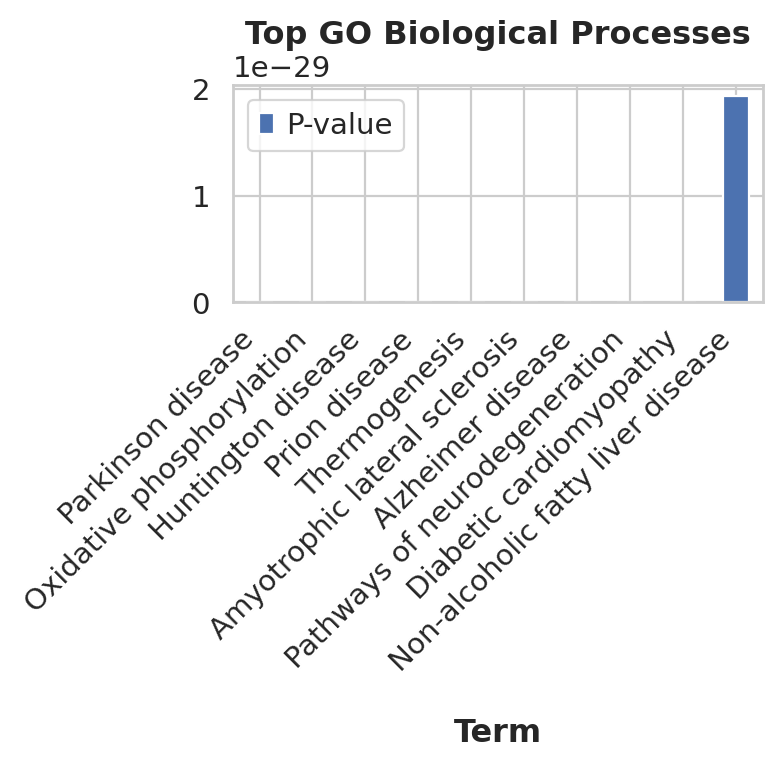

In [172]:
from gseapy import enrichr



# 进行KEGG富集
kegg_enrich = enrichr(
    gene_list=deg_filtered['names'].tolist(),
    gene_sets=['KEGG_2021_Human'],
    organism='Human',
    outdir='KEGG_enrichment',
    cutoff=0.50  # FDR阈值
)

# 进行GO富集
go_enrich = enrichr(
    gene_list=deg_filtered['names'].tolist(),
    gene_sets=['GO_Biological_Process_2023'],
    organism='Human',
    cutoff=0.50 # FDR阈值
)

# 可视化GO结果（示例）
kegg_enrich.results.head(10).plot.bar(
    x='Term', 
    y='P-value',
    title='Top GO Biological Processes'
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()



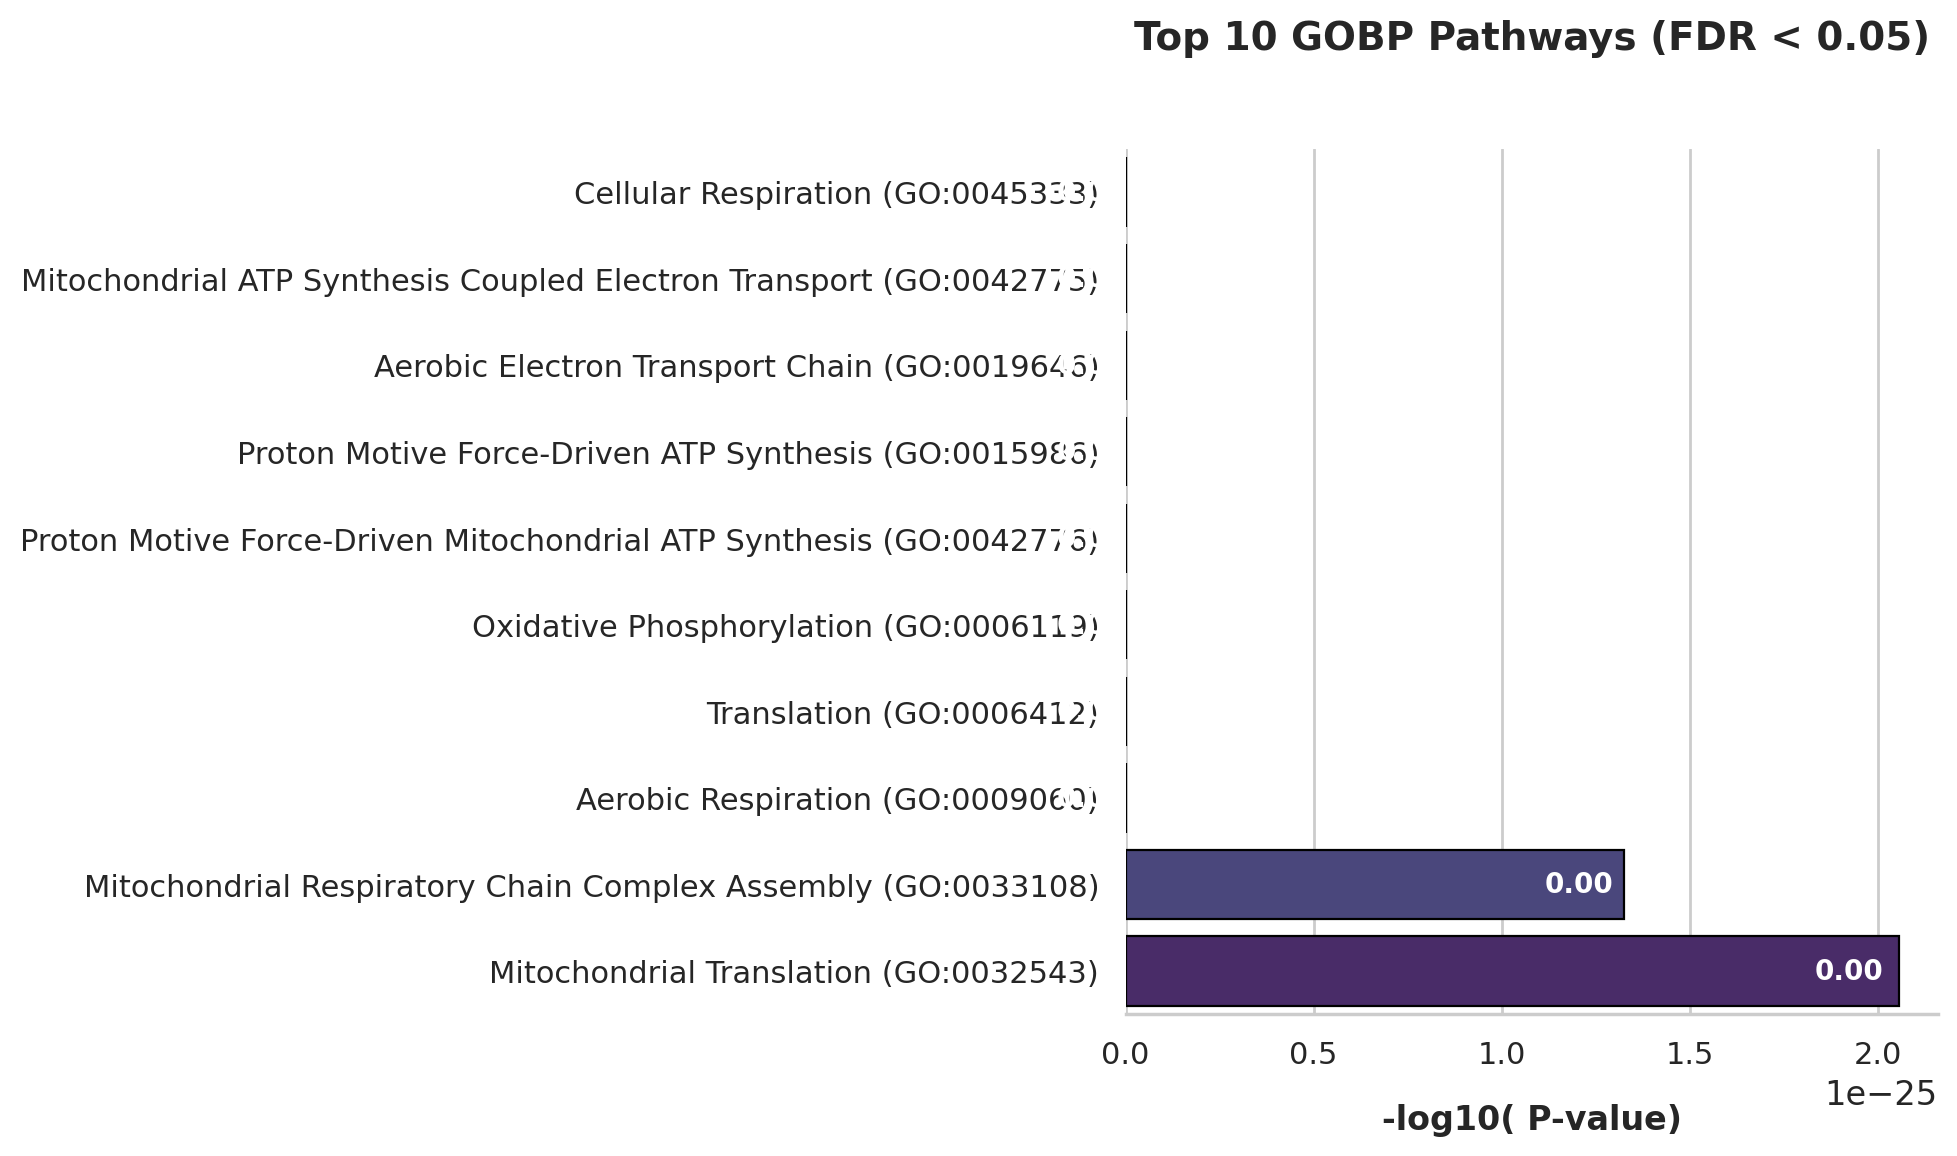

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# 进行GO富集
go_enrich = enrichr(
    gene_list=deg_filtered['names'].tolist(),
    gene_sets=['GO_Biological_Process_2023'],
    organism='Human',
    cutoff=0.50 # FDR阈值
)
# 数据预处理
plot_df = (
    go_enrich.results
    .sort_values('P-value', ascending=True)  # 按校正p值排序
    .head(10)  # 取前10显著通路
    .assign(  # 添加-log10转换值
        log_pvalue=lambda x: -np.log10(x['P-value'])
    )
)
# 可视化设置
plt.figure(figsize=(10, 6), dpi=100)
sns.set_theme(
    style="whitegrid", 
    context="notebook", 
    font_scale=1.1,
    rc={'axes.titlepad': 20}
)

# 创建水平条形图
ax = sns.barplot(
    data=plot_df,
    y='Term', 
    x='P-value',
    palette='viridis_r',  # 使用颜色渐变表示显著性
    edgecolor='black',
    linewidth=0.8
)

# 添加数据标签
for p in ax.patches:
    ax.annotate(
        f"{p.get_width():.2f}", 
        (p.get_width() * 0.98, p.get_y() + p.get_height()/2),
        ha='right', va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

# 样式优化
plt.title("Top 10 GOBP Pathways (FDR < 0.05)\n", 
         fontsize=14, fontweight='semibold')
plt.xlabel("-log10( P-value)", 
          fontsize=12, labelpad=12)
plt.ylabel("")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, rotation=0)

# 调整布局
sns.despine(left=True)
plt.tight_layout()
plt.savefig('GOBP_enrichment.png', dpi=300, bbox_inches='tight')
plt.savefig('GOBP_enrichment.pdf', dpi=300, bbox_inches='tight')
plt.show()

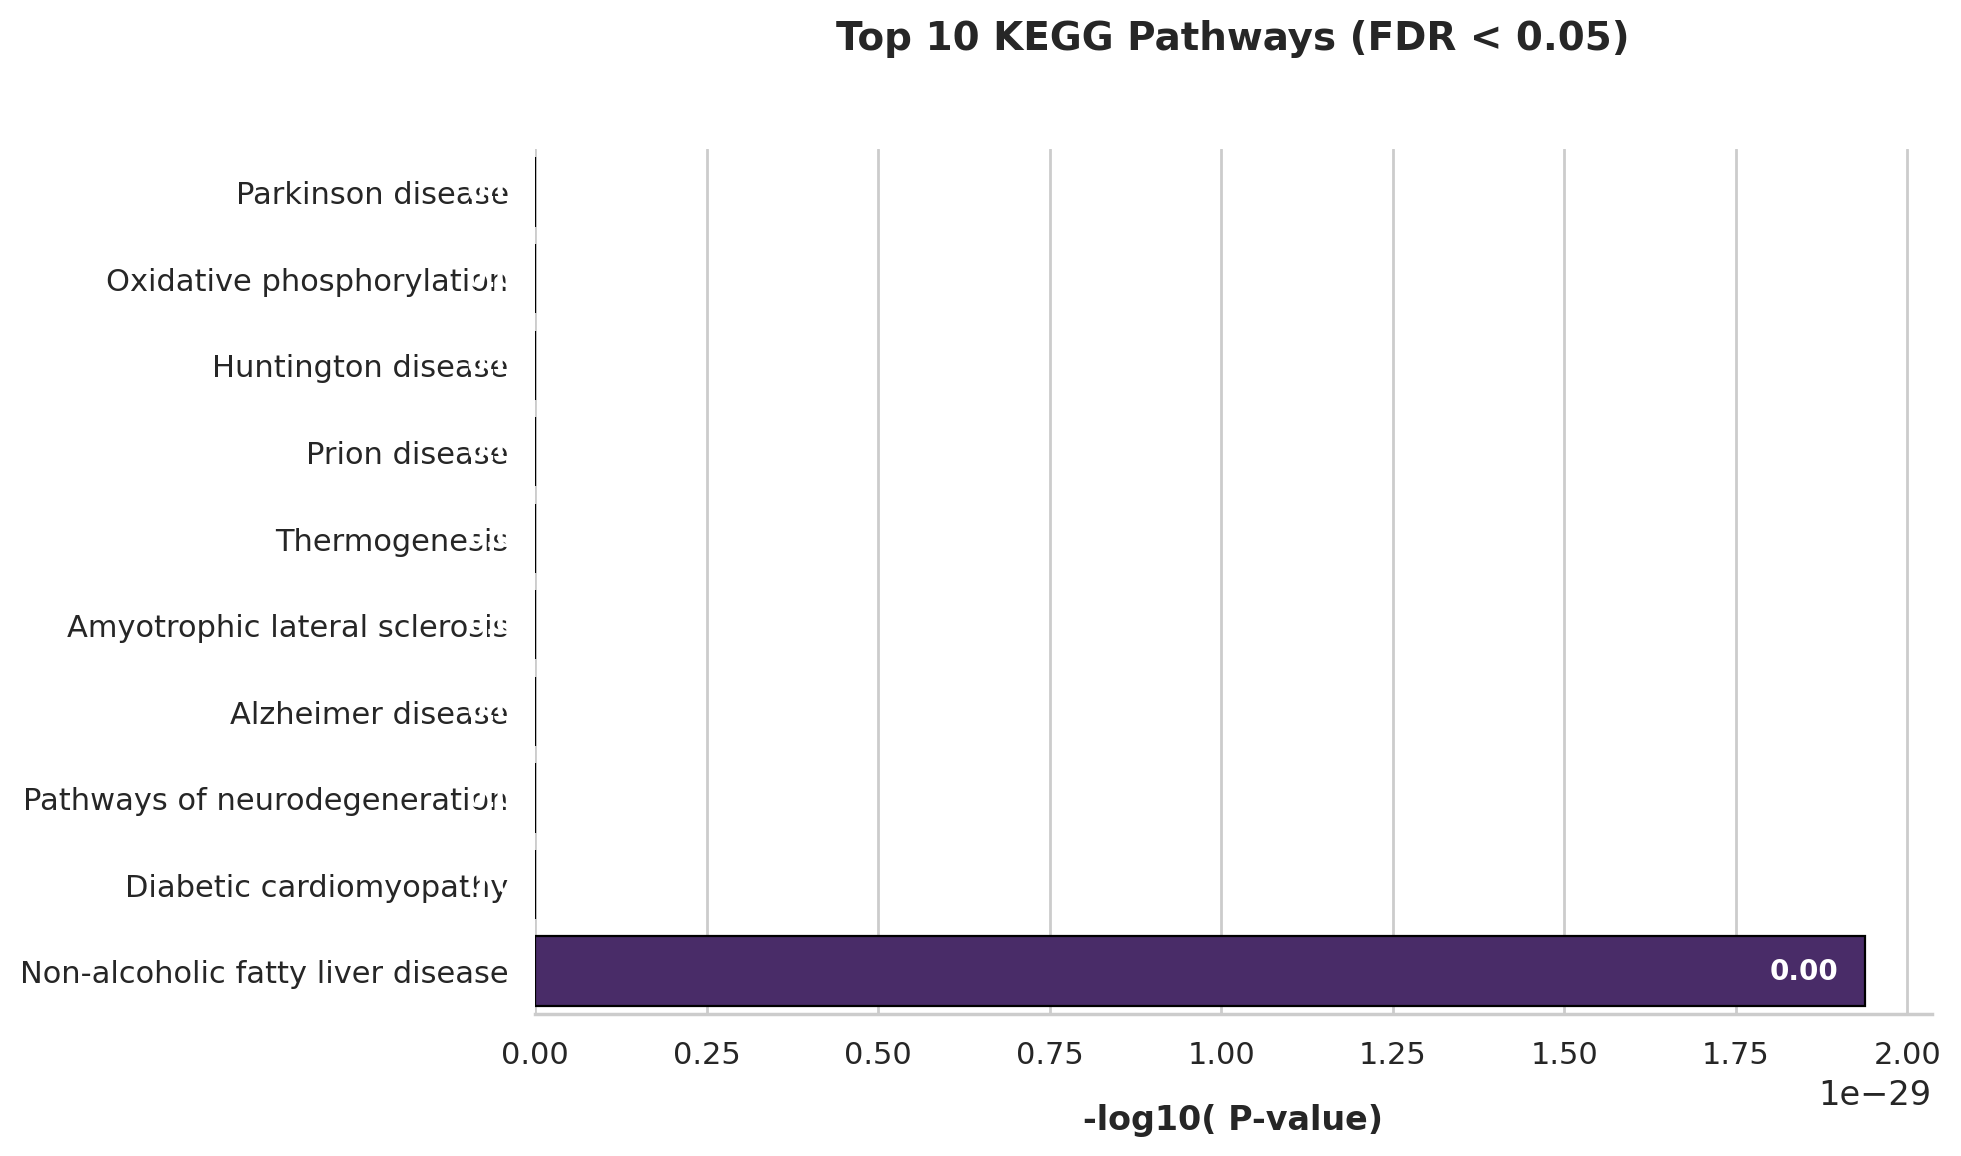

In [174]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 数据预处理
plot_df = (
    kegg_enrich.results
    .sort_values('Adjusted P-value', ascending=True)  # 按校正p值排序
    .head(10)  # 取前10显著通路
    .assign(  # 添加-log10转换值
        log_pvalue=lambda x: -np.log10(x['P-value'])
    )
)
# 可视化设置
plt.figure(figsize=(10, 6), dpi=100)
sns.set_theme(
    style="whitegrid", 
    context="notebook", 
    font_scale=1.1,
    rc={'axes.titlepad': 20}
)

# 创建水平条形图
ax = sns.barplot(
    data=plot_df,
    y='Term', 
    x='P-value',
    palette='viridis_r',  # 使用颜色渐变表示显著性
    edgecolor='black',
    linewidth=0.8
)

# 添加数据标签
for p in ax.patches:
    ax.annotate(
        f"{p.get_width():.2f}", 
        (p.get_width() * 0.98, p.get_y() + p.get_height()/2),
        ha='right', va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

# 样式优化
plt.title("Top 10 KEGG Pathways (FDR < 0.05)\n", 
         fontsize=14, fontweight='semibold')
plt.xlabel("-log10( P-value)", 
          fontsize=12, labelpad=12)
plt.ylabel("")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, rotation=0)

# 调整布局
sns.despine(left=True)
plt.tight_layout()
plt.savefig('KEGG_enrichment.png', dpi=300, bbox_inches='tight')
plt.savefig('KEGG_enrichment.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [175]:
# 进行GO富集
go_enrich = enrichr(
    gene_list=deg_filtered['names'].tolist(),
    gene_sets=['GO_Cellular_Component_2023'],
    organism='Human',
    cutoff=0.50 # FDR阈值
)

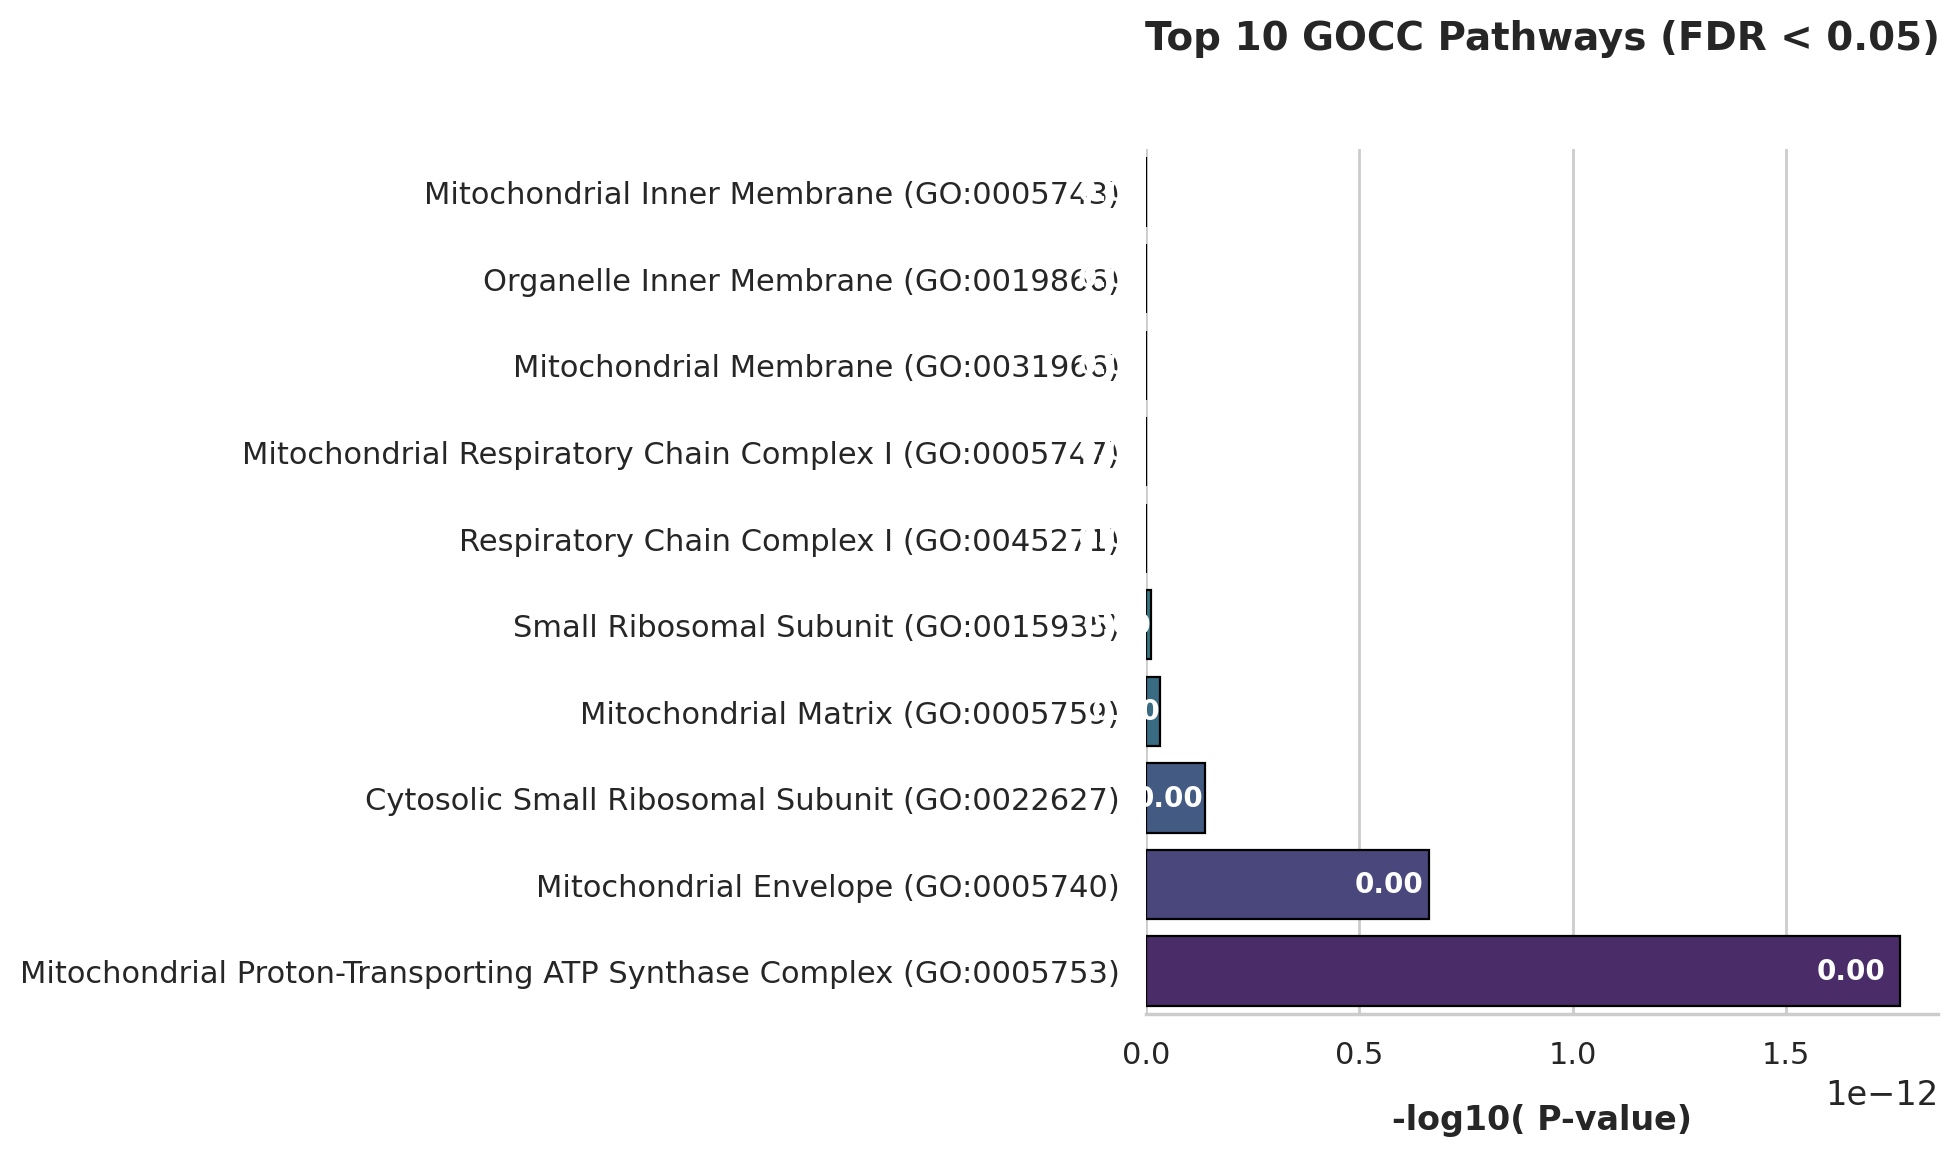

In [176]:
# 数据预处理
plot_df = (
    go_enrich.results
    .sort_values('P-value', ascending=True)  # 按校正p值排序
    .head(10)  # 取前10显著通路
    .assign(  # 添加-log10转换值
        log_pvalue=lambda x: -np.log10(x['P-value'])
    )
)
# 可视化设置
plt.figure(figsize=(10, 6), dpi=100)
sns.set_theme(
    style="whitegrid", 
    context="notebook", 
    font_scale=1.1,
    rc={'axes.titlepad': 20}
)

# 创建水平条形图
ax = sns.barplot(
    data=plot_df,
    y='Term', 
    x='P-value',
    palette='viridis_r',  # 使用颜色渐变表示显著性
    edgecolor='black',
    linewidth=0.8
)

# 添加数据标签
for p in ax.patches:
    ax.annotate(
        f"{p.get_width():.2f}", 
        (p.get_width() * 0.98, p.get_y() + p.get_height()/2),
        ha='right', va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

# 样式优化
plt.title("Top 10 GOCC Pathways (FDR < 0.05)\n", 
         fontsize=14, fontweight='semibold')
plt.xlabel("-log10( P-value)", 
          fontsize=12, labelpad=12)
plt.ylabel("")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, rotation=0)

# 调整布局
sns.despine(left=True)
plt.tight_layout()
plt.savefig('GOCC_enrichment.png', dpi=300, bbox_inches='tight')
plt.savefig('GOCC_enrichment.pdf', dpi=300, bbox_inches='tight')
plt.show()

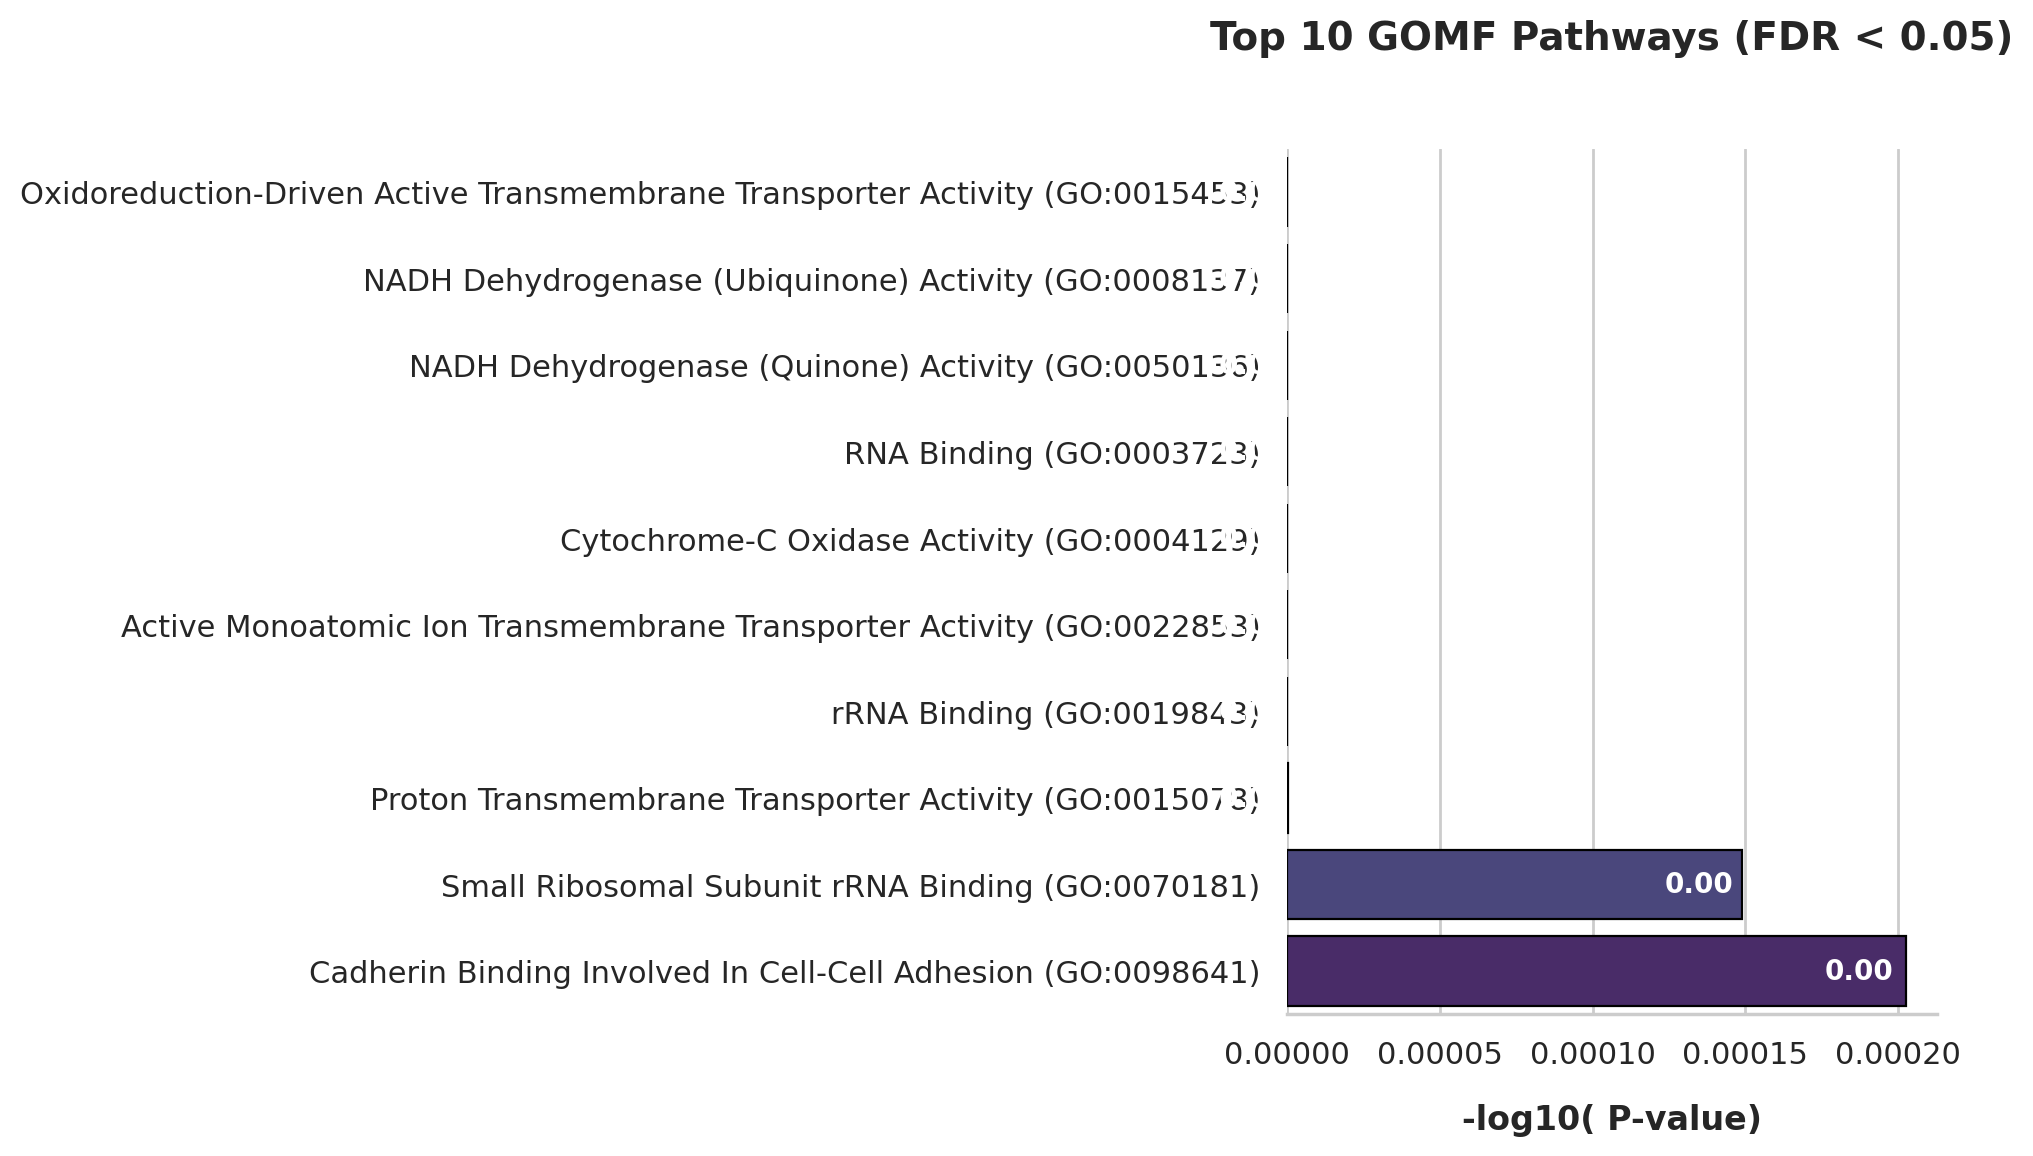

In [177]:
# 进行GO富集
go_enrich = enrichr(
    gene_list=deg_filtered['names'].tolist(),
    gene_sets=['GO_Molecular_Function_2023'],
    organism='Human',
    cutoff=0.50 # FDR阈值
)
# 数据预处理
plot_df = (
    go_enrich.results
    .sort_values('P-value', ascending=True)  # 按校正p值排序
    .head(10)  # 取前10显著通路
    .assign(  # 添加-log10转换值
        log_pvalue=lambda x: -np.log10(x['P-value'])
    )
)
# 可视化设置
plt.figure(figsize=(10, 6), dpi=100)
sns.set_theme(
    style="whitegrid", 
    context="notebook", 
    font_scale=1.1,
    rc={'axes.titlepad': 20}
)

# 创建水平条形图
ax = sns.barplot(
    data=plot_df,
    y='Term', 
    x='P-value',
    palette='viridis_r',  # 使用颜色渐变表示显著性
    edgecolor='black',
    linewidth=0.8
)

# 添加数据标签
for p in ax.patches:
    ax.annotate(
        f"{p.get_width():.2f}", 
        (p.get_width() * 0.98, p.get_y() + p.get_height()/2),
        ha='right', va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

# 样式优化
plt.title("Top 10 GOMF Pathways (FDR < 0.05)\n", 
         fontsize=14, fontweight='semibold')
plt.xlabel("-log10( P-value)", 
          fontsize=12, labelpad=12)
plt.ylabel("")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, rotation=0)

# 调整布局
sns.despine(left=True)
plt.tight_layout()
plt.savefig('GOMF_enrichment.png', dpi=300, bbox_inches='tight')
plt.savefig('GOMF_enrichment.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# 准备排序基因列表（按logFC降序）
gene_rank = deg_df.set_index('names')['logfoldchanges'].sort_values(ascending=False)

# 运行GSEA预排名分析
gsea_results = gp.prerank(
    rnk=gene_rank,
    gene_sets=['KEGG_2021_Human', 'GO_Biological_Process_2023'],
    processes=4,            # 并行线程数
    permutation_num=1000,   # 置换检验次数
    outdir='GSEA_results',  # 结果输出目录
    format='png',           # 输出图片格式
    seed=42
)

# 可视化Top通路
gp.dotplot(gsea_results.res2d, 
           column='adj_pval',  # 显式指定校正p值列
           title='GSEA Results',
           cutoff=0.25,
           cmap='viridis',
           size=10,
           show_side_cbar=True)

In [ ]:
# 准备排序基因列表（按logFC降序）
gene_rank = deg_df.set_index('names')['logfoldchanges'].sort_values(ascending=False)

# 运行GSEA预排名分析
gsea_results = gp.prerank(
    rnk=gene_rank,
    gene_sets=['KEGG_2021_Human', 'GO_Biological_Process_2023'],
    processes=4,            # 并行线程数
    permutation_num=1000,   # 置换检验次数
    outdir='GSEA_results',  # 结果输出目录
    format='png',           # 输出图片格式
    seed=42
)

# 可视化Top通路
gp.dotplot(gsea_results.res2d, 
           column='adj_pval',  # 显式指定校正p值列
           title='GSEA Results',
           cutoff=0.25,
           cmap='viridis',
           size=10,
           show_side_cbar=True)